# UniFORM Normalization of Feature-Level CyCIF Prostate Cancer Needle Biopsy Samples (Pickle file Version)

# 0. Import UniFORM

In [1]:
# — Core preprocessing routines
from UniFORM.preprocessing import (
    log_transform_intensities, 
    fit_two_component_gmm, 
    process_sample_distributions
)

# — Registration / alignment
from UniFORM.registration import (
    correct_shifted_histograms, 
    plot_histogram_distributions, 
    compute_landmark_shifts, 
    compute_correlation_shifts, 
    automatic_registration
)

# — Landmark picking UI & finetuning
from UniFORM.landmark import (
    plot_distributions_plotly, 
    landmark_refinement
)

# — Core normalization step
from UniFORM.normalization import (
    plot_line_histogram, 
    plot_correlations_and_fit_line,
    plot_gmm, 
    calculate_shift_in_log_pixels, 
    generate_normalized_feature
)



# 1. Load Raw Data

In [2]:
PRAD_sample_names = ['PRAD-01',
                     'PRAD-02',
                     'PRAD-03',
                     'PRAD-04',
                     'PRAD-05',
                     'PRAD-06',
                     'PRAD-07',
                     'PRAD-08',
                     'PRAD-09',
                     'PRAD-10',
                     'PRAD-11',
                     'PRAD-12',
                     'PRAD-13',
                     'PRAD-14',
                     'PRAD-15',
                     'PRAD-16',
                     'PRAD-17',
                     'PRAD-18',
                     'PRAD-19',
                     'PRAD-20']

In [3]:
PRAD_markers = ['DAPI_R1', 'EPCAM', 'CD56', 'CD45', 
                'aSMA', 'ChromA', 'CK14', 'Ki67', 
                'GZMB', 'ECAD', 'PD1', 'CD31', 
                'CD45RA', 'HLADRB1', 'CD3', 'p53', 
                'FOXA1', 'CDX2', 'CD20', 'NOTCH1']

In [4]:
import os
import pickle
import glob

def feature_data_loader(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
    return data

feature_data_dir = "/Users/wangmar/ACED_pickle_data_filtered"
pickle_files_paths = glob.glob(os.path.join(feature_data_dir, '*.pkl'))
pickle_files_dict = {os.path.basename(path).split('_mean_intensity.pkl')[0]: path for path in pickle_files_paths}
ordered_pickle_files_paths = [pickle_files_dict[sample] for sample in PRAD_sample_names if sample in pickle_files_dict]
feature_data = [feature_data_loader(path) for path in ordered_pickle_files_paths]

# 2. Perform histogram calculation

Markers:   0%|                                                                                                  | 0/20 [00:00<?, ?it/s]

✅ Processing PRAD-01 for marker DAPI_R1......
✅ Processing PRAD-02 for marker DAPI_R1......
✅ Processing PRAD-03 for marker DAPI_R1......
✅ Processing PRAD-04 for marker DAPI_R1......
✅ Processing PRAD-05 for marker DAPI_R1......
✅ Processing PRAD-06 for marker DAPI_R1......
✅ Processing PRAD-07 for marker DAPI_R1......
✅ Processing PRAD-08 for marker DAPI_R1......
✅ Processing PRAD-09 for marker DAPI_R1......
✅ Processing PRAD-10 for marker DAPI_R1......
✅ Processing PRAD-11 for marker DAPI_R1......
✅ Processing PRAD-12 for marker DAPI_R1......
✅ Processing PRAD-13 for marker DAPI_R1......
✅ Processing PRAD-14 for marker DAPI_R1......
✅ Processing PRAD-15 for marker DAPI_R1......
✅ Processing PRAD-16 for marker DAPI_R1......
✅ Processing PRAD-17 for marker DAPI_R1......
✅ Processing PRAD-18 for marker DAPI_R1......
✅ Processing PRAD-19 for marker DAPI_R1......
✅ Processing PRAD-20 for marker DAPI_R1......


Markers:   5%|████▌                                                                                     | 1/20 [00:02<00:39,  2.09s/it]

✅ Processing PRAD-01 for marker EPCAM......
✅ Processing PRAD-02 for marker EPCAM......
✅ Processing PRAD-03 for marker EPCAM......
✅ Processing PRAD-04 for marker EPCAM......
✅ Processing PRAD-05 for marker EPCAM......
✅ Processing PRAD-06 for marker EPCAM......
✅ Processing PRAD-07 for marker EPCAM......
✅ Processing PRAD-08 for marker EPCAM......
✅ Processing PRAD-09 for marker EPCAM......
✅ Processing PRAD-10 for marker EPCAM......
✅ Processing PRAD-11 for marker EPCAM......
✅ Processing PRAD-12 for marker EPCAM......
✅ Processing PRAD-13 for marker EPCAM......
✅ Processing PRAD-14 for marker EPCAM......
✅ Processing PRAD-15 for marker EPCAM......
✅ Processing PRAD-16 for marker EPCAM......
✅ Processing PRAD-17 for marker EPCAM......
✅ Processing PRAD-18 for marker EPCAM......
✅ Processing PRAD-19 for marker EPCAM......
✅ Processing PRAD-20 for marker EPCAM......


Markers:  10%|█████████                                                                                 | 2/20 [00:04<00:44,  2.46s/it]

✅ Processing PRAD-01 for marker CD56......
✅ Processing PRAD-02 for marker CD56......
✅ Processing PRAD-03 for marker CD56......
✅ Processing PRAD-04 for marker CD56......
✅ Processing PRAD-05 for marker CD56......
✅ Processing PRAD-06 for marker CD56......
✅ Processing PRAD-07 for marker CD56......
✅ Processing PRAD-08 for marker CD56......
✅ Processing PRAD-09 for marker CD56......
✅ Processing PRAD-10 for marker CD56......
✅ Processing PRAD-11 for marker CD56......
✅ Processing PRAD-12 for marker CD56......
✅ Processing PRAD-13 for marker CD56......
✅ Processing PRAD-14 for marker CD56......
✅ Processing PRAD-15 for marker CD56......
✅ Processing PRAD-16 for marker CD56......
✅ Processing PRAD-17 for marker CD56......
✅ Processing PRAD-18 for marker CD56......
✅ Processing PRAD-19 for marker CD56......
✅ Processing PRAD-20 for marker CD56......


Markers:  15%|█████████████▌                                                                            | 3/20 [00:08<00:48,  2.85s/it]

✅ Processing PRAD-01 for marker CD45......
✅ Processing PRAD-02 for marker CD45......
✅ Processing PRAD-03 for marker CD45......
✅ Processing PRAD-04 for marker CD45......
✅ Processing PRAD-05 for marker CD45......
✅ Processing PRAD-06 for marker CD45......
✅ Processing PRAD-07 for marker CD45......
✅ Processing PRAD-08 for marker CD45......
✅ Processing PRAD-09 for marker CD45......
✅ Processing PRAD-10 for marker CD45......
✅ Processing PRAD-11 for marker CD45......
✅ Processing PRAD-12 for marker CD45......
✅ Processing PRAD-13 for marker CD45......
✅ Processing PRAD-14 for marker CD45......
✅ Processing PRAD-15 for marker CD45......
✅ Processing PRAD-16 for marker CD45......
✅ Processing PRAD-17 for marker CD45......
✅ Processing PRAD-18 for marker CD45......
✅ Processing PRAD-19 for marker CD45......
✅ Processing PRAD-20 for marker CD45......


Markers:  20%|██████████████████                                                                        | 4/20 [00:10<00:44,  2.77s/it]

✅ Processing PRAD-01 for marker aSMA......
✅ Processing PRAD-02 for marker aSMA......
✅ Processing PRAD-03 for marker aSMA......
✅ Processing PRAD-04 for marker aSMA......
✅ Processing PRAD-05 for marker aSMA......
✅ Processing PRAD-06 for marker aSMA......
✅ Processing PRAD-07 for marker aSMA......
✅ Processing PRAD-08 for marker aSMA......
✅ Processing PRAD-09 for marker aSMA......
✅ Processing PRAD-10 for marker aSMA......
✅ Processing PRAD-11 for marker aSMA......
✅ Processing PRAD-12 for marker aSMA......
✅ Processing PRAD-13 for marker aSMA......
✅ Processing PRAD-14 for marker aSMA......
✅ Processing PRAD-15 for marker aSMA......
✅ Processing PRAD-16 for marker aSMA......
✅ Processing PRAD-17 for marker aSMA......
✅ Processing PRAD-18 for marker aSMA......
✅ Processing PRAD-19 for marker aSMA......
✅ Processing PRAD-20 for marker aSMA......


Markers:  25%|██████████████████████▌                                                                   | 5/20 [00:12<00:38,  2.56s/it]

✅ Processing PRAD-01 for marker ChromA......
✅ Processing PRAD-02 for marker ChromA......
✅ Processing PRAD-03 for marker ChromA......
✅ Processing PRAD-04 for marker ChromA......
✅ Processing PRAD-05 for marker ChromA......
✅ Processing PRAD-06 for marker ChromA......
✅ Processing PRAD-07 for marker ChromA......
✅ Processing PRAD-08 for marker ChromA......
✅ Processing PRAD-09 for marker ChromA......
✅ Processing PRAD-10 for marker ChromA......
✅ Processing PRAD-11 for marker ChromA......
✅ Processing PRAD-12 for marker ChromA......
✅ Processing PRAD-13 for marker ChromA......
✅ Processing PRAD-14 for marker ChromA......
✅ Processing PRAD-15 for marker ChromA......
✅ Processing PRAD-16 for marker ChromA......
✅ Processing PRAD-17 for marker ChromA......
✅ Processing PRAD-18 for marker ChromA......
✅ Processing PRAD-19 for marker ChromA......
✅ Processing PRAD-20 for marker ChromA......


Markers:  30%|███████████████████████████                                                               | 6/20 [00:15<00:34,  2.49s/it]

✅ Processing PRAD-01 for marker CK14......
✅ Processing PRAD-02 for marker CK14......
✅ Processing PRAD-03 for marker CK14......
✅ Processing PRAD-04 for marker CK14......
✅ Processing PRAD-05 for marker CK14......
✅ Processing PRAD-06 for marker CK14......
✅ Processing PRAD-07 for marker CK14......
✅ Processing PRAD-08 for marker CK14......
✅ Processing PRAD-09 for marker CK14......
✅ Processing PRAD-10 for marker CK14......
✅ Processing PRAD-11 for marker CK14......
✅ Processing PRAD-12 for marker CK14......
✅ Processing PRAD-13 for marker CK14......
✅ Processing PRAD-14 for marker CK14......
✅ Processing PRAD-15 for marker CK14......
✅ Processing PRAD-16 for marker CK14......
✅ Processing PRAD-17 for marker CK14......
✅ Processing PRAD-18 for marker CK14......
✅ Processing PRAD-19 for marker CK14......
✅ Processing PRAD-20 for marker CK14......


Markers:  35%|███████████████████████████████▍                                                          | 7/20 [00:18<00:33,  2.57s/it]

✅ Processing PRAD-01 for marker Ki67......
✅ Processing PRAD-02 for marker Ki67......
✅ Processing PRAD-03 for marker Ki67......
✅ Processing PRAD-04 for marker Ki67......
✅ Processing PRAD-05 for marker Ki67......
✅ Processing PRAD-06 for marker Ki67......
✅ Processing PRAD-07 for marker Ki67......
✅ Processing PRAD-08 for marker Ki67......
✅ Processing PRAD-09 for marker Ki67......
✅ Processing PRAD-10 for marker Ki67......
✅ Processing PRAD-11 for marker Ki67......
✅ Processing PRAD-12 for marker Ki67......
✅ Processing PRAD-13 for marker Ki67......
✅ Processing PRAD-14 for marker Ki67......
✅ Processing PRAD-15 for marker Ki67......
✅ Processing PRAD-16 for marker Ki67......
✅ Processing PRAD-17 for marker Ki67......
✅ Processing PRAD-18 for marker Ki67......
✅ Processing PRAD-19 for marker Ki67......
✅ Processing PRAD-20 for marker Ki67......


Markers:  40%|████████████████████████████████████                                                      | 8/20 [00:22<00:36,  3.02s/it]

✅ Processing PRAD-01 for marker GZMB......
✅ Processing PRAD-02 for marker GZMB......
✅ Processing PRAD-03 for marker GZMB......
✅ Processing PRAD-04 for marker GZMB......
✅ Processing PRAD-05 for marker GZMB......
✅ Processing PRAD-06 for marker GZMB......
✅ Processing PRAD-07 for marker GZMB......
✅ Processing PRAD-08 for marker GZMB......
✅ Processing PRAD-09 for marker GZMB......
✅ Processing PRAD-10 for marker GZMB......
✅ Processing PRAD-11 for marker GZMB......
✅ Processing PRAD-12 for marker GZMB......
✅ Processing PRAD-13 for marker GZMB......
✅ Processing PRAD-14 for marker GZMB......
✅ Processing PRAD-15 for marker GZMB......
✅ Processing PRAD-16 for marker GZMB......
✅ Processing PRAD-17 for marker GZMB......
✅ Processing PRAD-18 for marker GZMB......
✅ Processing PRAD-19 for marker GZMB......
✅ Processing PRAD-20 for marker GZMB......


Markers:  45%|████████████████████████████████████████▌                                                 | 9/20 [00:25<00:33,  3.03s/it]

✅ Processing PRAD-01 for marker ECAD......
✅ Processing PRAD-02 for marker ECAD......
✅ Processing PRAD-03 for marker ECAD......
✅ Processing PRAD-04 for marker ECAD......
✅ Processing PRAD-05 for marker ECAD......
✅ Processing PRAD-06 for marker ECAD......
✅ Processing PRAD-07 for marker ECAD......
✅ Processing PRAD-08 for marker ECAD......
✅ Processing PRAD-09 for marker ECAD......
✅ Processing PRAD-10 for marker ECAD......
✅ Processing PRAD-11 for marker ECAD......
✅ Processing PRAD-12 for marker ECAD......
✅ Processing PRAD-13 for marker ECAD......
✅ Processing PRAD-14 for marker ECAD......
✅ Processing PRAD-15 for marker ECAD......
✅ Processing PRAD-16 for marker ECAD......
✅ Processing PRAD-17 for marker ECAD......
✅ Processing PRAD-18 for marker ECAD......
✅ Processing PRAD-19 for marker ECAD......
✅ Processing PRAD-20 for marker ECAD......


Markers:  50%|████████████████████████████████████████████▌                                            | 10/20 [00:28<00:30,  3.05s/it]

✅ Processing PRAD-01 for marker PD1......
✅ Processing PRAD-02 for marker PD1......
✅ Processing PRAD-03 for marker PD1......
✅ Processing PRAD-04 for marker PD1......
✅ Processing PRAD-05 for marker PD1......
✅ Processing PRAD-06 for marker PD1......
✅ Processing PRAD-07 for marker PD1......
✅ Processing PRAD-08 for marker PD1......
✅ Processing PRAD-09 for marker PD1......
✅ Processing PRAD-10 for marker PD1......
✅ Processing PRAD-11 for marker PD1......
✅ Processing PRAD-12 for marker PD1......
✅ Processing PRAD-13 for marker PD1......
✅ Processing PRAD-14 for marker PD1......
✅ Processing PRAD-15 for marker PD1......
✅ Processing PRAD-16 for marker PD1......
✅ Processing PRAD-17 for marker PD1......
✅ Processing PRAD-18 for marker PD1......
✅ Processing PRAD-19 for marker PD1......
✅ Processing PRAD-20 for marker PD1......


Markers:  55%|████████████████████████████████████████████████▉                                        | 11/20 [00:30<00:26,  2.95s/it]

✅ Processing PRAD-01 for marker CD31......
✅ Processing PRAD-02 for marker CD31......
✅ Processing PRAD-03 for marker CD31......
✅ Processing PRAD-04 for marker CD31......
✅ Processing PRAD-05 for marker CD31......
✅ Processing PRAD-06 for marker CD31......
✅ Processing PRAD-07 for marker CD31......
✅ Processing PRAD-08 for marker CD31......
✅ Processing PRAD-09 for marker CD31......
✅ Processing PRAD-10 for marker CD31......
✅ Processing PRAD-11 for marker CD31......
✅ Processing PRAD-12 for marker CD31......
✅ Processing PRAD-13 for marker CD31......
✅ Processing PRAD-14 for marker CD31......
✅ Processing PRAD-15 for marker CD31......
✅ Processing PRAD-16 for marker CD31......
✅ Processing PRAD-17 for marker CD31......
✅ Processing PRAD-18 for marker CD31......
✅ Processing PRAD-19 for marker CD31......
✅ Processing PRAD-20 for marker CD31......


Markers:  60%|█████████████████████████████████████████████████████▍                                   | 12/20 [00:33<00:23,  2.90s/it]

✅ Processing PRAD-01 for marker CD45RA......
✅ Processing PRAD-02 for marker CD45RA......
✅ Processing PRAD-03 for marker CD45RA......
✅ Processing PRAD-04 for marker CD45RA......
✅ Processing PRAD-05 for marker CD45RA......
✅ Processing PRAD-06 for marker CD45RA......
✅ Processing PRAD-07 for marker CD45RA......
✅ Processing PRAD-08 for marker CD45RA......
✅ Processing PRAD-09 for marker CD45RA......
✅ Processing PRAD-10 for marker CD45RA......
✅ Processing PRAD-11 for marker CD45RA......
✅ Processing PRAD-12 for marker CD45RA......
✅ Processing PRAD-13 for marker CD45RA......
✅ Processing PRAD-14 for marker CD45RA......
✅ Processing PRAD-15 for marker CD45RA......
✅ Processing PRAD-16 for marker CD45RA......
✅ Processing PRAD-17 for marker CD45RA......
✅ Processing PRAD-18 for marker CD45RA......
✅ Processing PRAD-19 for marker CD45RA......
✅ Processing PRAD-20 for marker CD45RA......


Markers:  65%|█████████████████████████████████████████████████████████▊                               | 13/20 [00:37<00:21,  3.09s/it]

✅ Processing PRAD-01 for marker HLADRB1......
✅ Processing PRAD-02 for marker HLADRB1......
✅ Processing PRAD-03 for marker HLADRB1......
✅ Processing PRAD-04 for marker HLADRB1......
✅ Processing PRAD-05 for marker HLADRB1......
✅ Processing PRAD-06 for marker HLADRB1......
✅ Processing PRAD-07 for marker HLADRB1......
✅ Processing PRAD-08 for marker HLADRB1......
✅ Processing PRAD-09 for marker HLADRB1......
✅ Processing PRAD-10 for marker HLADRB1......
✅ Processing PRAD-11 for marker HLADRB1......
✅ Processing PRAD-12 for marker HLADRB1......
✅ Processing PRAD-13 for marker HLADRB1......
✅ Processing PRAD-14 for marker HLADRB1......
✅ Processing PRAD-15 for marker HLADRB1......
✅ Processing PRAD-16 for marker HLADRB1......
✅ Processing PRAD-17 for marker HLADRB1......
✅ Processing PRAD-18 for marker HLADRB1......
✅ Processing PRAD-19 for marker HLADRB1......
✅ Processing PRAD-20 for marker HLADRB1......


Markers:  70%|██████████████████████████████████████████████████████████████▎                          | 14/20 [00:42<00:21,  3.61s/it]

✅ Processing PRAD-01 for marker CD3......
✅ Processing PRAD-02 for marker CD3......
✅ Processing PRAD-03 for marker CD3......
✅ Processing PRAD-04 for marker CD3......
✅ Processing PRAD-05 for marker CD3......
✅ Processing PRAD-06 for marker CD3......
✅ Processing PRAD-07 for marker CD3......
✅ Processing PRAD-08 for marker CD3......
✅ Processing PRAD-09 for marker CD3......
✅ Processing PRAD-10 for marker CD3......
✅ Processing PRAD-11 for marker CD3......
✅ Processing PRAD-12 for marker CD3......
✅ Processing PRAD-13 for marker CD3......
✅ Processing PRAD-14 for marker CD3......
✅ Processing PRAD-15 for marker CD3......
✅ Processing PRAD-16 for marker CD3......
✅ Processing PRAD-17 for marker CD3......
✅ Processing PRAD-18 for marker CD3......
✅ Processing PRAD-19 for marker CD3......
✅ Processing PRAD-20 for marker CD3......


Markers:  75%|██████████████████████████████████████████████████████████████████▊                      | 15/20 [00:45<00:17,  3.58s/it]

✅ Processing PRAD-01 for marker p53......
✅ Processing PRAD-02 for marker p53......
✅ Processing PRAD-03 for marker p53......
✅ Processing PRAD-04 for marker p53......
✅ Processing PRAD-05 for marker p53......
✅ Processing PRAD-06 for marker p53......
✅ Processing PRAD-07 for marker p53......
✅ Processing PRAD-08 for marker p53......
✅ Processing PRAD-09 for marker p53......
✅ Processing PRAD-10 for marker p53......
✅ Processing PRAD-11 for marker p53......
✅ Processing PRAD-12 for marker p53......
✅ Processing PRAD-13 for marker p53......
✅ Processing PRAD-14 for marker p53......
✅ Processing PRAD-15 for marker p53......
✅ Processing PRAD-16 for marker p53......
✅ Processing PRAD-17 for marker p53......
✅ Processing PRAD-18 for marker p53......
✅ Processing PRAD-19 for marker p53......
✅ Processing PRAD-20 for marker p53......


Markers:  80%|███████████████████████████████████████████████████████████████████████▏                 | 16/20 [00:49<00:14,  3.74s/it]

✅ Processing PRAD-01 for marker FOXA1......
✅ Processing PRAD-02 for marker FOXA1......
✅ Processing PRAD-03 for marker FOXA1......
✅ Processing PRAD-04 for marker FOXA1......
✅ Processing PRAD-05 for marker FOXA1......
✅ Processing PRAD-06 for marker FOXA1......
✅ Processing PRAD-07 for marker FOXA1......
✅ Processing PRAD-08 for marker FOXA1......
✅ Processing PRAD-09 for marker FOXA1......
✅ Processing PRAD-10 for marker FOXA1......
✅ Processing PRAD-11 for marker FOXA1......
✅ Processing PRAD-12 for marker FOXA1......
✅ Processing PRAD-13 for marker FOXA1......
✅ Processing PRAD-14 for marker FOXA1......
✅ Processing PRAD-15 for marker FOXA1......
✅ Processing PRAD-16 for marker FOXA1......
✅ Processing PRAD-17 for marker FOXA1......
✅ Processing PRAD-18 for marker FOXA1......
✅ Processing PRAD-19 for marker FOXA1......
✅ Processing PRAD-20 for marker FOXA1......


Markers:  85%|███████████████████████████████████████████████████████████████████████████▋             | 17/20 [00:53<00:10,  3.63s/it]

✅ Processing PRAD-01 for marker CDX2......
✅ Processing PRAD-02 for marker CDX2......
✅ Processing PRAD-03 for marker CDX2......
✅ Processing PRAD-04 for marker CDX2......
✅ Processing PRAD-05 for marker CDX2......
✅ Processing PRAD-06 for marker CDX2......
✅ Processing PRAD-07 for marker CDX2......
✅ Processing PRAD-08 for marker CDX2......
✅ Processing PRAD-09 for marker CDX2......
✅ Processing PRAD-10 for marker CDX2......
✅ Processing PRAD-11 for marker CDX2......
✅ Processing PRAD-12 for marker CDX2......
✅ Processing PRAD-13 for marker CDX2......
✅ Processing PRAD-14 for marker CDX2......
✅ Processing PRAD-15 for marker CDX2......
✅ Processing PRAD-16 for marker CDX2......
✅ Processing PRAD-17 for marker CDX2......
✅ Processing PRAD-18 for marker CDX2......
✅ Processing PRAD-19 for marker CDX2......
✅ Processing PRAD-20 for marker CDX2......


Markers:  90%|████████████████████████████████████████████████████████████████████████████████         | 18/20 [00:57<00:07,  3.93s/it]

✅ Processing PRAD-01 for marker CD20......
✅ Processing PRAD-02 for marker CD20......
✅ Processing PRAD-03 for marker CD20......
✅ Processing PRAD-04 for marker CD20......
✅ Processing PRAD-05 for marker CD20......
✅ Processing PRAD-06 for marker CD20......
✅ Processing PRAD-07 for marker CD20......
✅ Processing PRAD-08 for marker CD20......
✅ Processing PRAD-09 for marker CD20......
✅ Processing PRAD-10 for marker CD20......
✅ Processing PRAD-11 for marker CD20......
✅ Processing PRAD-12 for marker CD20......
✅ Processing PRAD-13 for marker CD20......
✅ Processing PRAD-14 for marker CD20......
✅ Processing PRAD-15 for marker CD20......
✅ Processing PRAD-16 for marker CD20......
✅ Processing PRAD-17 for marker CD20......
✅ Processing PRAD-18 for marker CD20......
✅ Processing PRAD-19 for marker CD20......
✅ Processing PRAD-20 for marker CD20......


Markers:  95%|████████████████████████████████████████████████████████████████████████████████████▌    | 19/20 [01:18<00:09,  9.11s/it]

✅ Processing PRAD-01 for marker NOTCH1......
✅ Processing PRAD-02 for marker NOTCH1......
✅ Processing PRAD-03 for marker NOTCH1......
✅ Processing PRAD-04 for marker NOTCH1......
✅ Processing PRAD-05 for marker NOTCH1......
✅ Processing PRAD-06 for marker NOTCH1......
✅ Processing PRAD-07 for marker NOTCH1......
✅ Processing PRAD-08 for marker NOTCH1......
✅ Processing PRAD-09 for marker NOTCH1......
✅ Processing PRAD-10 for marker NOTCH1......
✅ Processing PRAD-11 for marker NOTCH1......
✅ Processing PRAD-12 for marker NOTCH1......
✅ Processing PRAD-13 for marker NOTCH1......
✅ Processing PRAD-14 for marker NOTCH1......
✅ Processing PRAD-15 for marker NOTCH1......
✅ Processing PRAD-16 for marker NOTCH1......
✅ Processing PRAD-17 for marker NOTCH1......
✅ Processing PRAD-18 for marker NOTCH1......
✅ Processing PRAD-19 for marker NOTCH1......
✅ Processing PRAD-20 for marker NOTCH1......


Markers: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:29<00:00,  4.48s/it]


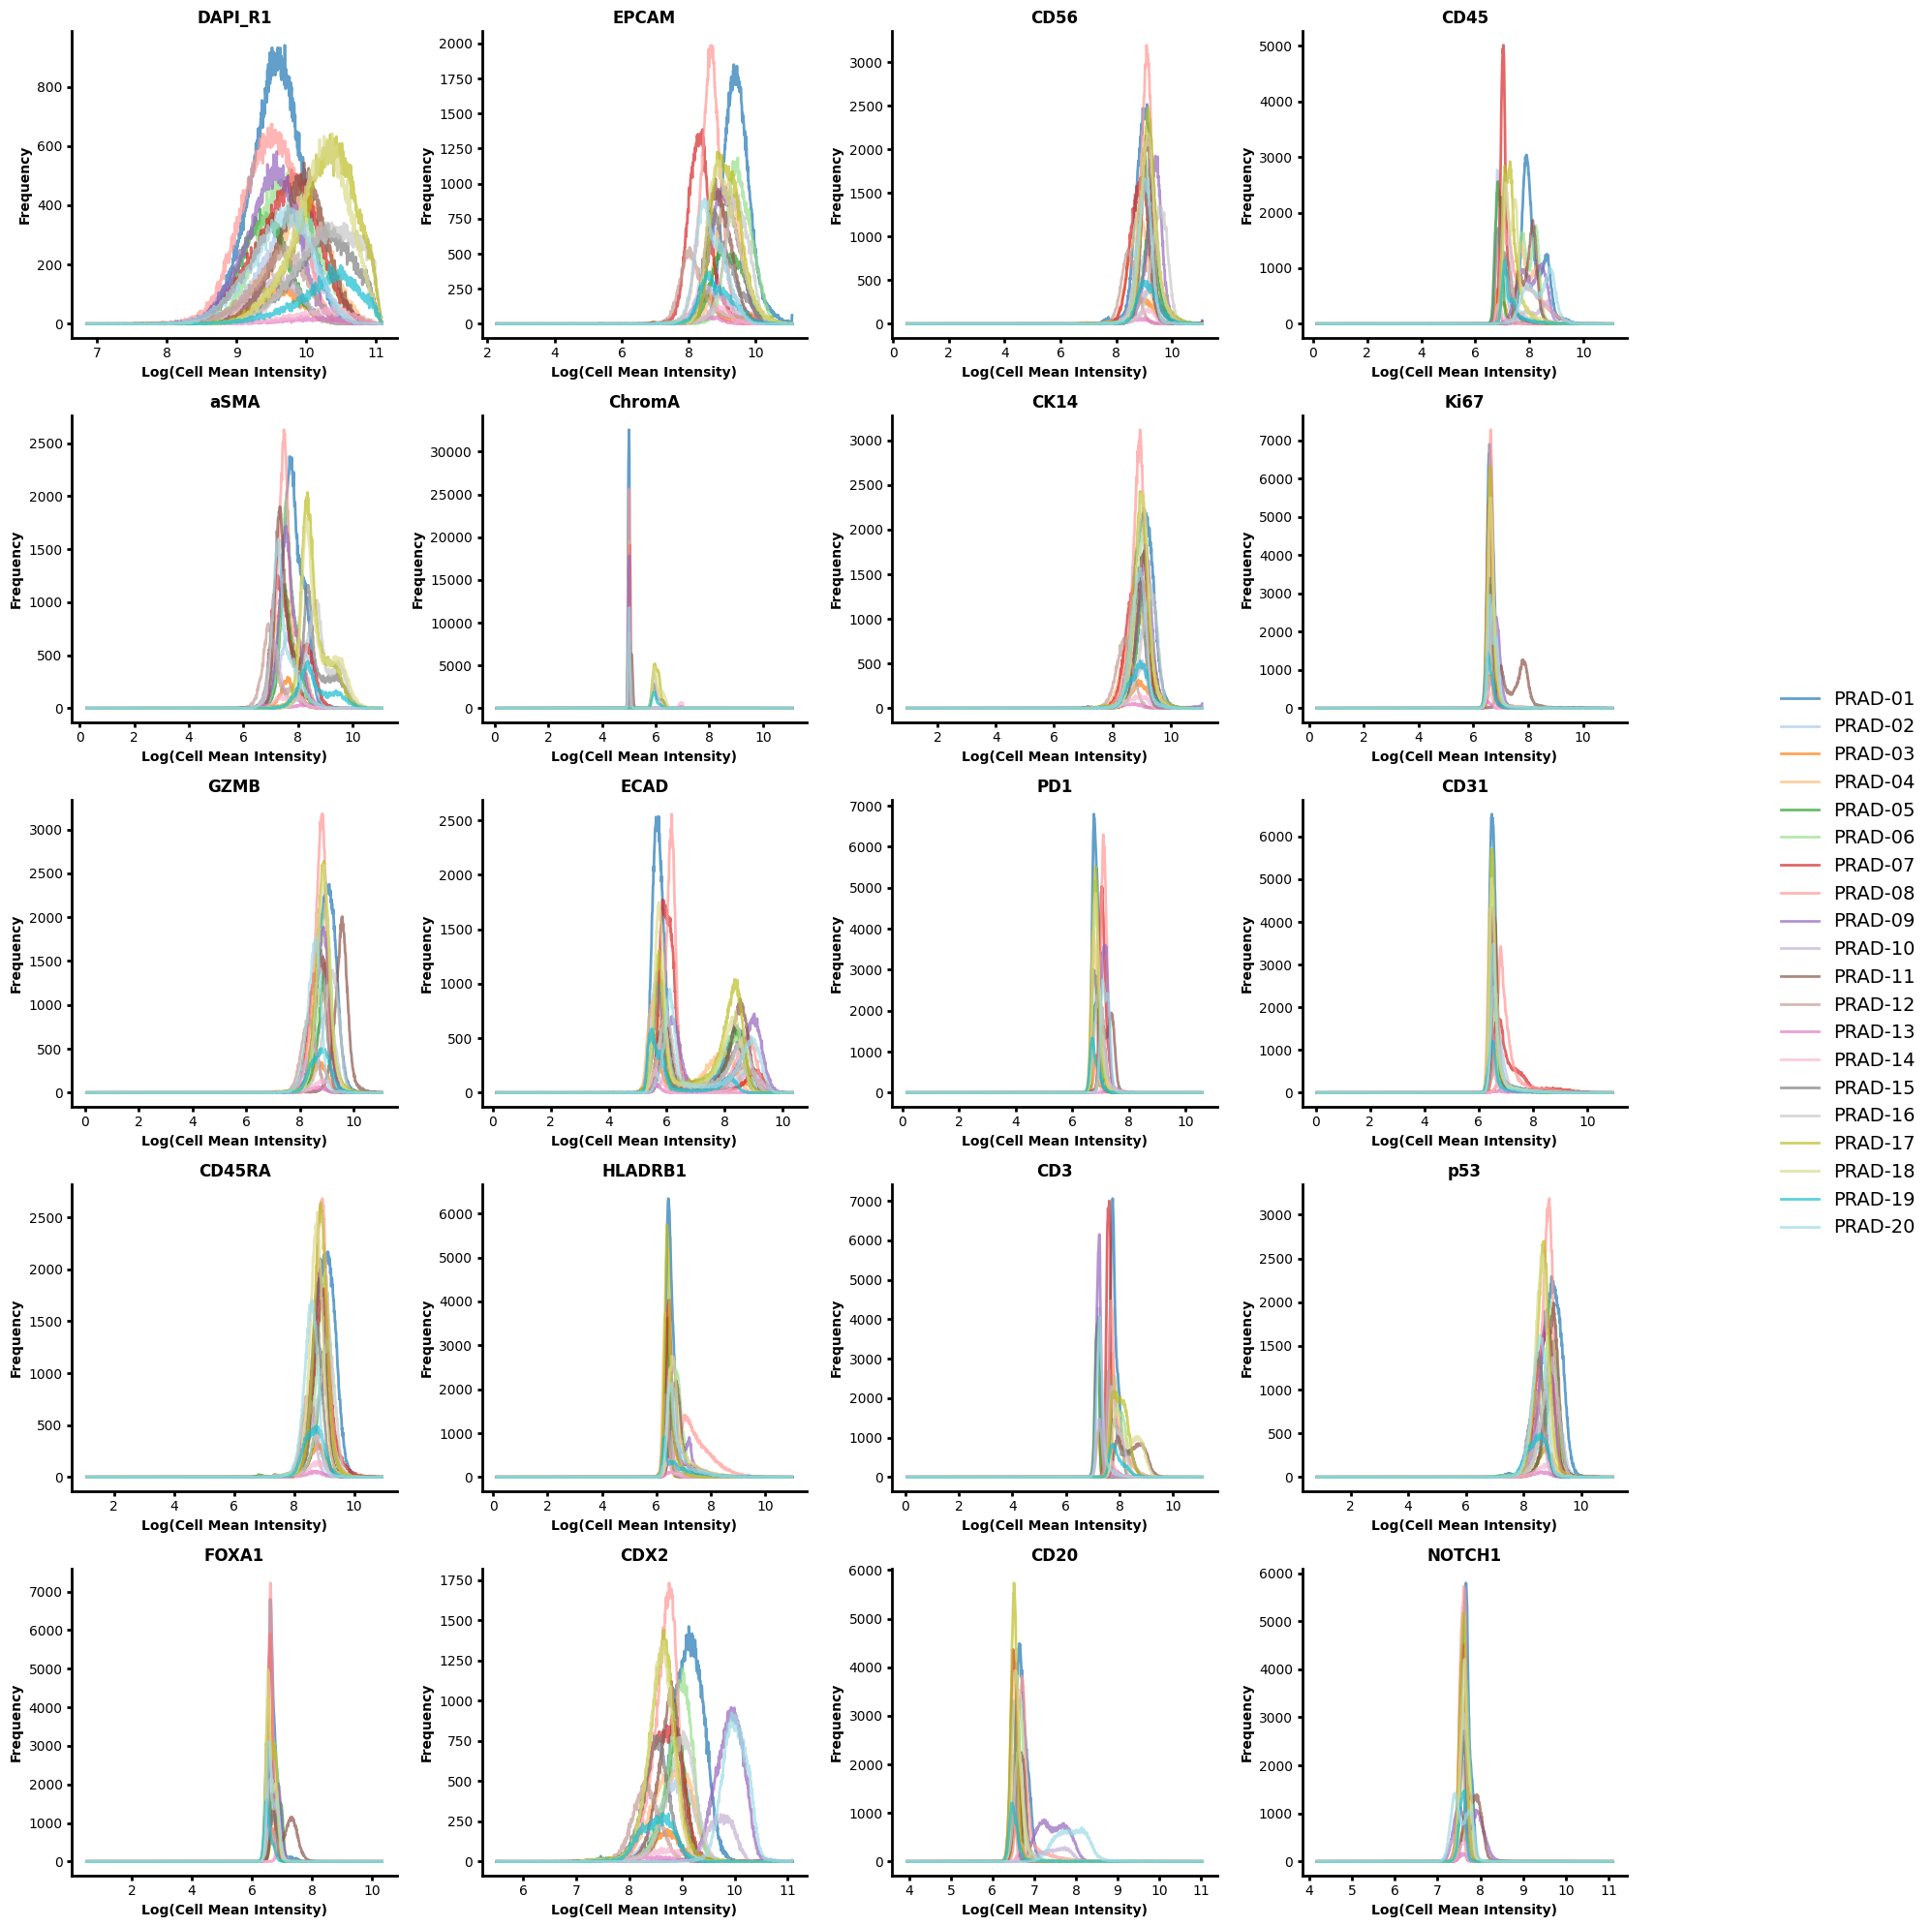

In [5]:
intensity_ranges, histograms, gmm_models = process_sample_distributions(
    feature_input       = feature_data,
    sample_ids          = PRAD_sample_names,
    all_markers         = PRAD_markers,
    markers_to_plot     = PRAD_markers,
    num_bins            = 1024,
    plots_per_row       = 4,
    dpi                 = 100,
    xlims               = None,
    ylims               = None,
    verbose=True
)

# 3. Perform automatic rigid landmark data registration to align marker distributions


-------------------- Processing marker 'DAPI_R1' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [-39, 0, -27, 49, -84, -4, 8, -61, -52, -41, 48, -21, 80, 122, 135, 155, 144, 128, 157, -10]
✨ Auto-computed reference landmark for 'DAPI_R1' on 'PRAD-02': 705
✨ Implied landmark positions for 'DAPI_R1': [666, 705, 678, 754, 621, 701, 713, 644, 653, 664, 753, 684, 785, 827, 840, 860, 849, 833, 862, 695]


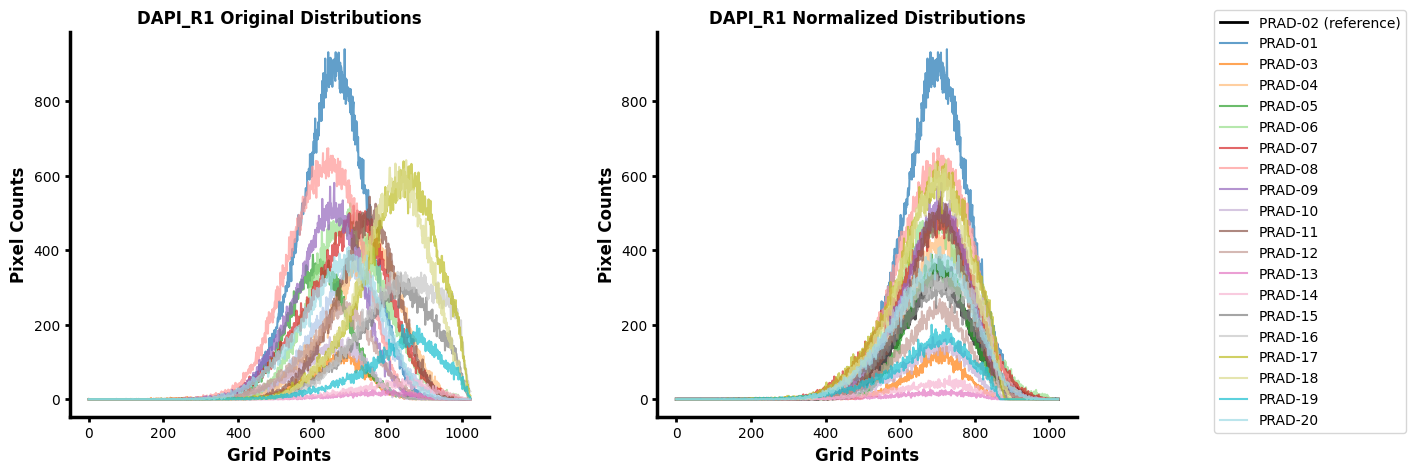


-------------------- Processing marker 'EPCAM' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-05' by histogram proximity 

✨ Computed shifts: [31, -43, -54, 5, 0, 42, -96, -56, -11, -54, -30, -121, -59, -31, -23, 34, -8, -19, -46, -61]
✨ Auto-computed reference landmark for 'EPCAM' on 'PRAD-05': 776
✨ Implied landmark positions for 'EPCAM': [807, 733, 722, 781, 776, 818, 680, 720, 765, 722, 746, 655, 717, 745, 753, 810, 768, 757, 730, 715]


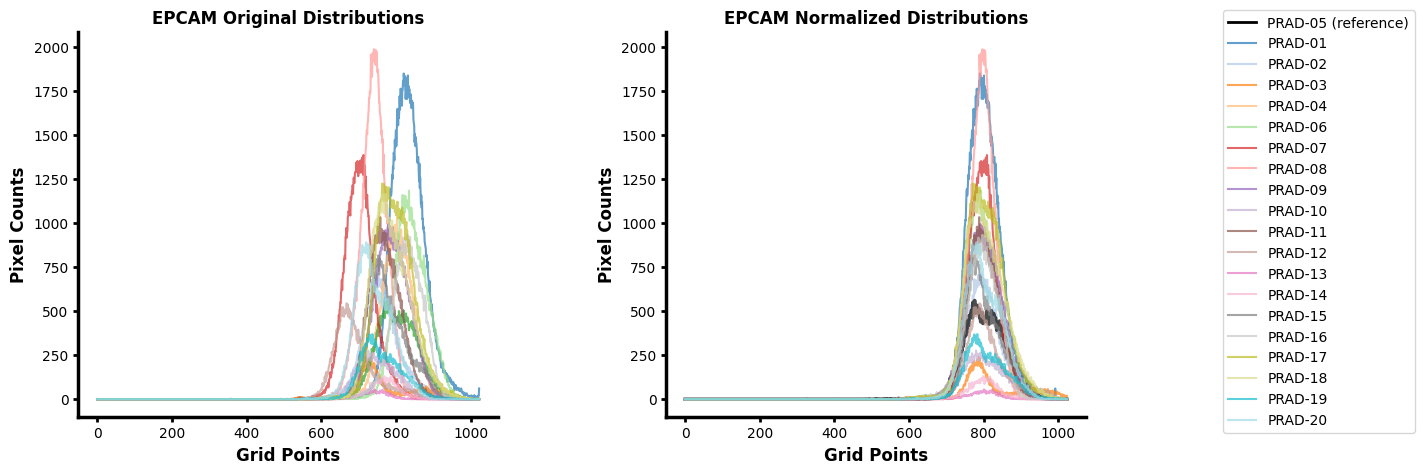


-------------------- Processing marker 'CD56' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [-12, 0, -12, -37, 3, -16, -32, -12, 20, -2, -6, -68, -28, -7, -17, 38, -1, -2, -4, -14]
✨ Auto-computed reference landmark for 'CD56' on 'PRAD-02': 844
✨ Implied landmark positions for 'CD56': [832, 844, 832, 807, 847, 828, 812, 832, 864, 842, 838, 776, 816, 837, 827, 882, 843, 842, 840, 830]


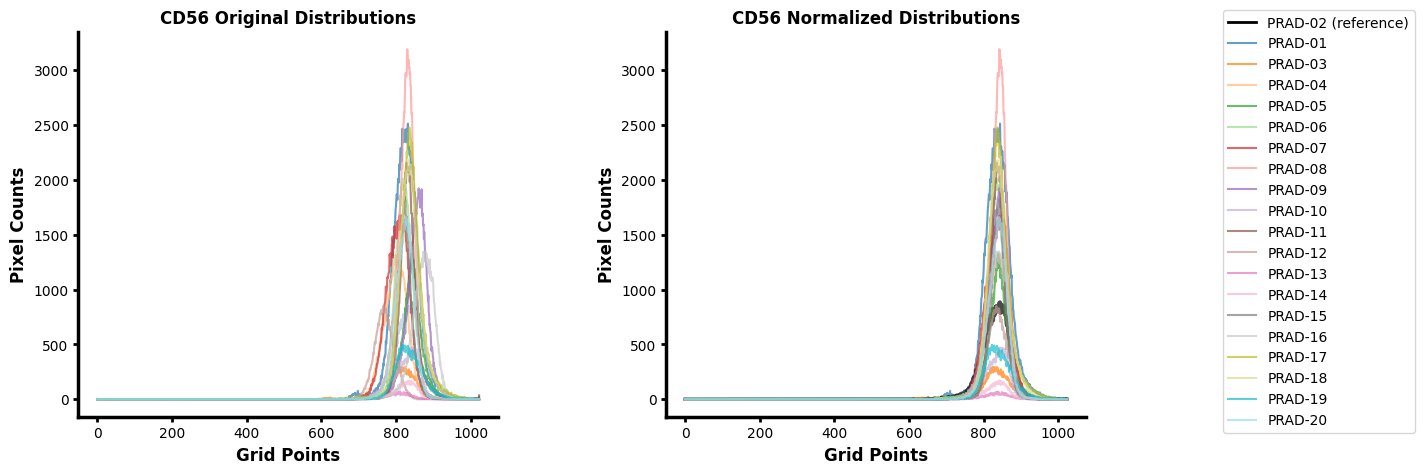


-------------------- Processing marker 'CD45' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-19' by histogram proximity 

✨ Computed shifts: [73, -25, -23, 57, -23, 64, -6, 0, 63, 133, 91, -6, -21, -22, -21, 1, 6, 8, 0, 147]
✨ Auto-computed reference landmark for 'CD45' on 'PRAD-19': 650
✨ Implied landmark positions for 'CD45': [723, 625, 627, 707, 627, 714, 644, 650, 713, 783, 741, 644, 629, 628, 629, 651, 656, 658, 650, 797]


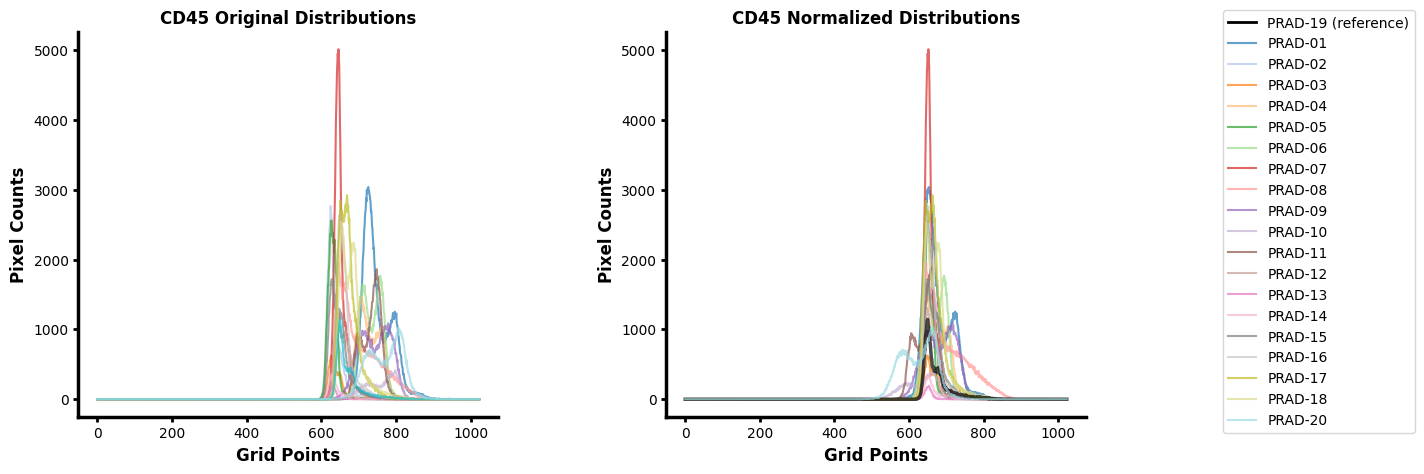


-------------------- Processing marker 'aSMA' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [-1, 0, -6, -25, -16, -12, -29, -22, -15, -47, -32, -70, -33, -22, 71, 92, 65, 66, 62, -40]
✨ Auto-computed reference landmark for 'aSMA' on 'PRAD-02': 705
✨ Implied landmark positions for 'aSMA': [704, 705, 699, 680, 689, 693, 676, 683, 690, 658, 673, 635, 672, 683, 776, 797, 770, 771, 767, 665]


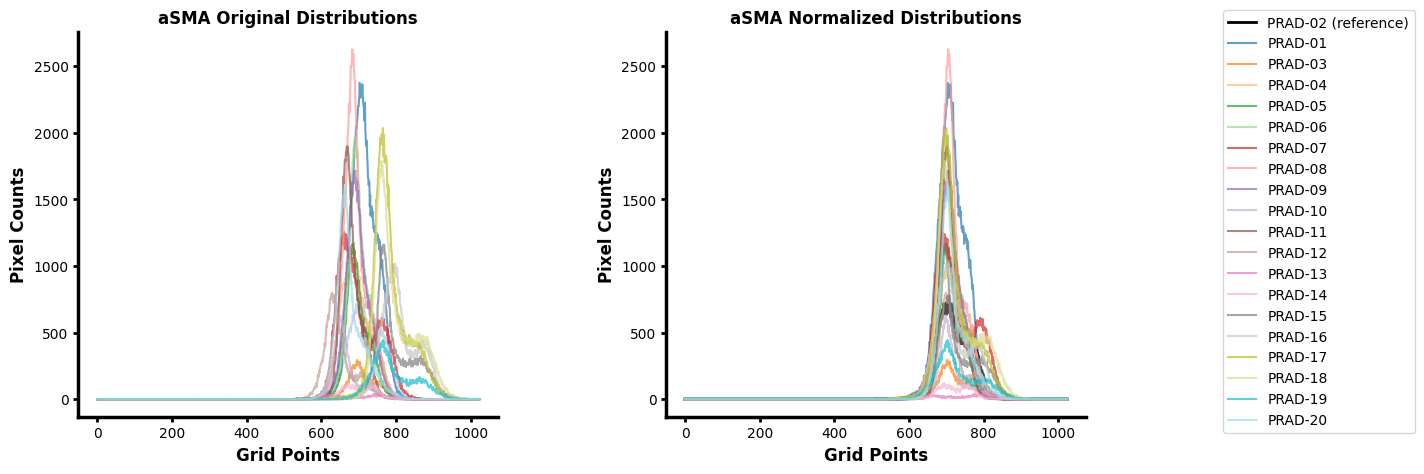


-------------------- Processing marker 'ChromA' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-05' by histogram proximity 

✨ Computed shifts: [-1, 0, 2, -1, 0, 0, 2, 0, 0, -1, 4, -1, 178, 182, 86, 86, 90, 88, 86, 0]
✨ Auto-computed reference landmark for 'ChromA' on 'PRAD-05': 458
✨ Implied landmark positions for 'ChromA': [457, 458, 460, 457, 458, 458, 460, 458, 458, 457, 462, 457, 636, 640, 544, 544, 548, 546, 544, 458]


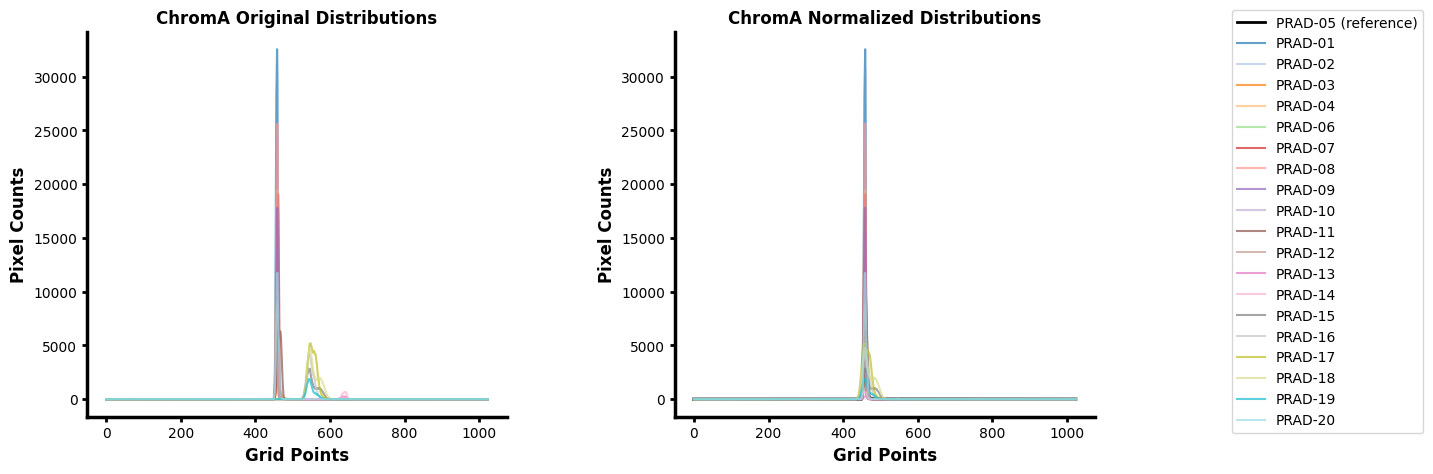


-------------------- Processing marker 'CK14' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [8, 0, -4, -16, 2, 4, -13, -14, 9, -9, 6, -58, -36, -12, -13, 26, -4, 2, -7, -11]
✨ Auto-computed reference landmark for 'CK14' on 'PRAD-02': 811
✨ Implied landmark positions for 'CK14': [819, 811, 807, 795, 813, 815, 798, 797, 820, 802, 817, 753, 775, 799, 798, 837, 807, 813, 804, 800]


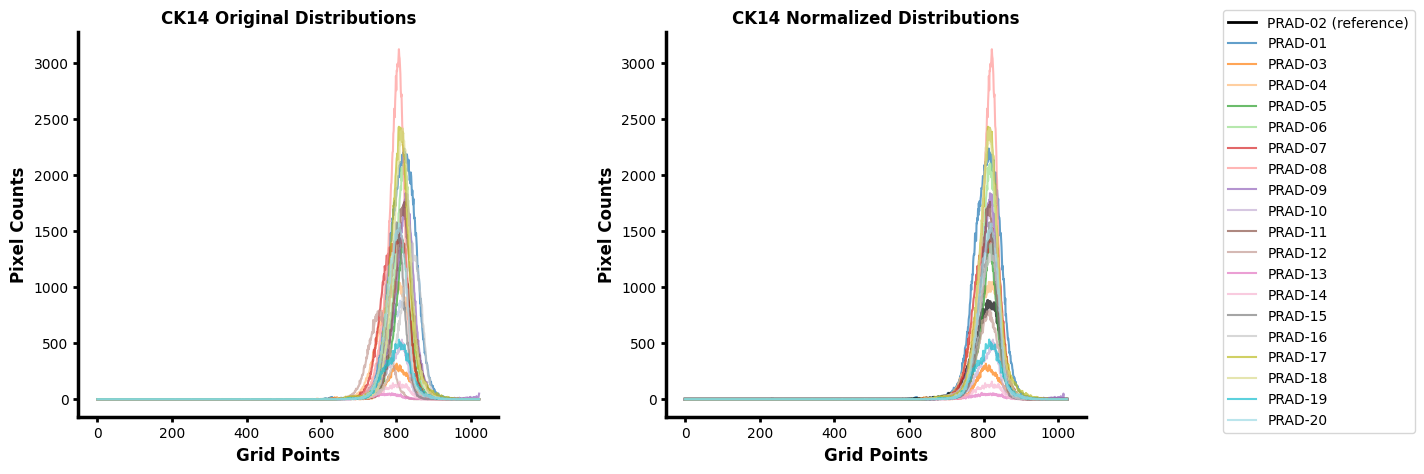


-------------------- Processing marker 'Ki67' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [-2, 0, 2, -7, 2, 1, -4, 0, 8, 6, 111, -9, -11, -7, -5, 7, -2, 0, -7, 1]
✨ Auto-computed reference landmark for 'Ki67' on 'PRAD-02': 601
✨ Implied landmark positions for 'Ki67': [599, 601, 603, 594, 603, 602, 597, 601, 609, 607, 712, 592, 590, 594, 596, 608, 599, 601, 594, 602]


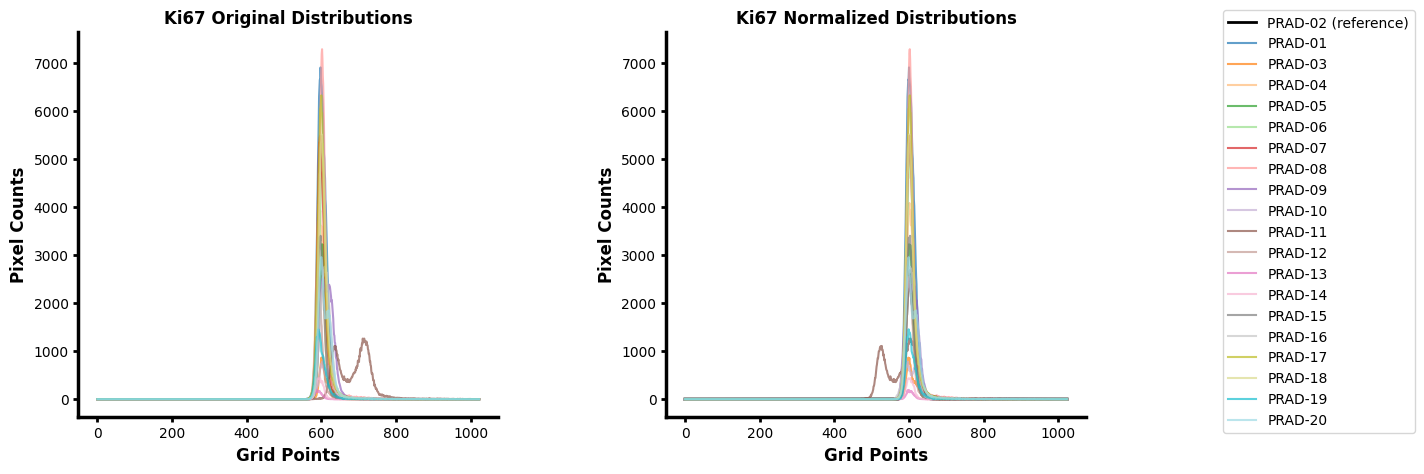


-------------------- Processing marker 'GZMB' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [7, 0, -18, -20, -4, -5, -20, -20, -11, -48, 55, -57, -28, -4, -18, 21, -9, -7, -15, -39]
✨ Auto-computed reference landmark for 'GZMB' on 'PRAD-02': 841
✨ Implied landmark positions for 'GZMB': [848, 841, 823, 821, 837, 836, 821, 821, 830, 793, 896, 784, 813, 837, 823, 862, 832, 834, 826, 802]


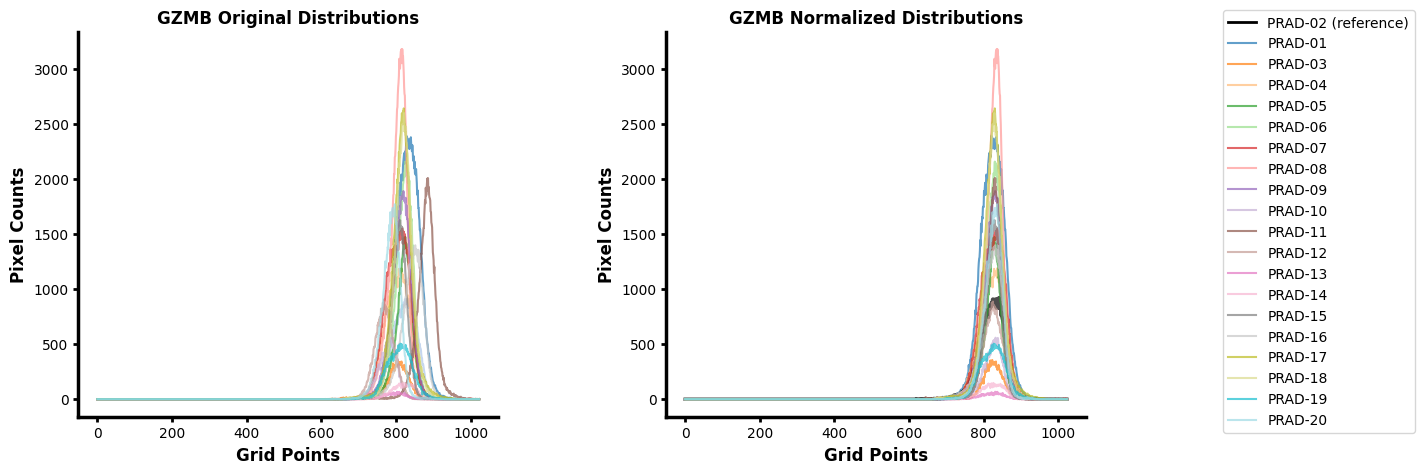


-------------------- Processing marker 'ECAD' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-16' by histogram proximity 

✨ Computed shifts: [-26, -25, -24, -40, -19, -17, 6, 17, 29, 13, 2, -4, -43, -33, -25, 0, -24, -23, -38, 17]
✨ Auto-computed reference landmark for 'ECAD' on 'PRAD-16': 583
✨ Implied landmark positions for 'ECAD': [557, 558, 559, 543, 564, 566, 589, 600, 612, 596, 585, 579, 540, 550, 558, 583, 559, 560, 545, 600]


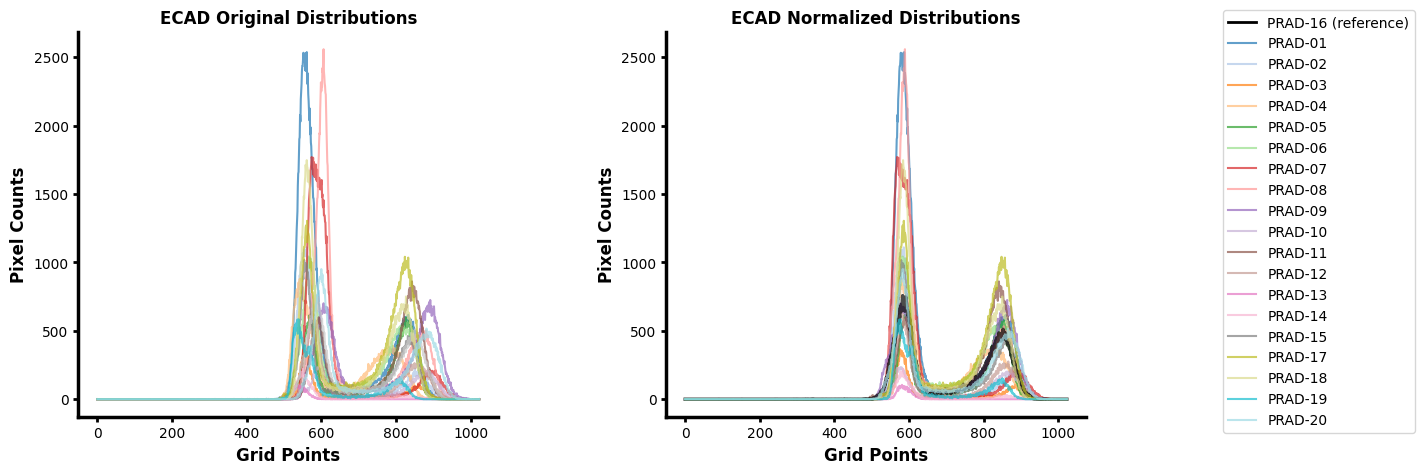


-------------------- Processing marker 'PD1' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [-7, 0, -4, -12, -2, -5, 18, 24, 25, 21, 26, 17, 59, 34, -9, 5, -6, -4, -14, 25]
✨ Auto-computed reference landmark for 'PD1' on 'PRAD-02': 656
✨ Implied landmark positions for 'PD1': [649, 656, 652, 644, 654, 651, 674, 680, 681, 677, 682, 673, 715, 690, 647, 661, 650, 652, 642, 681]


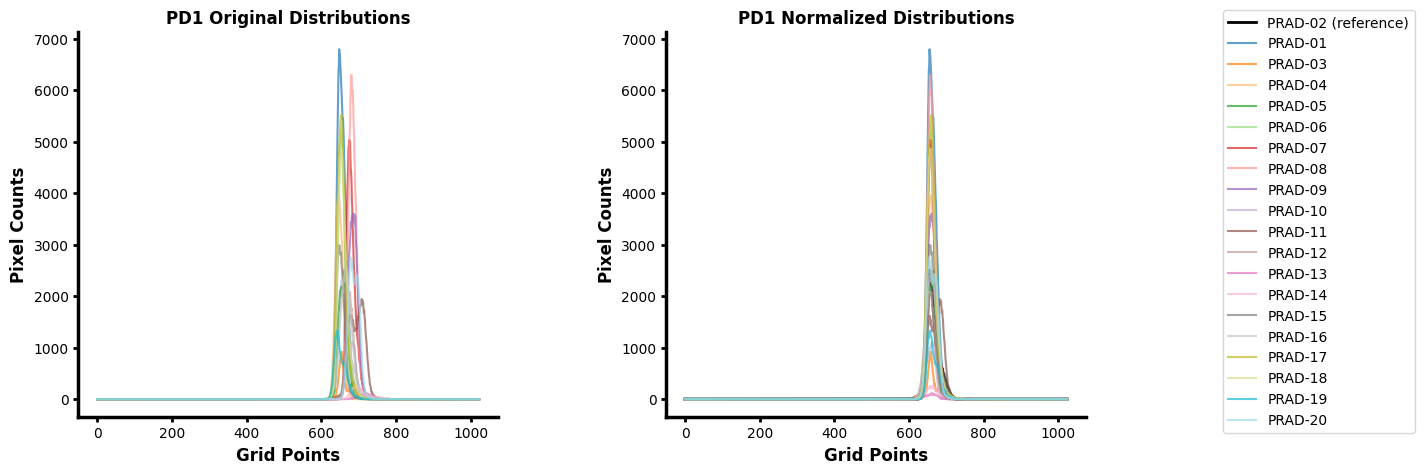


-------------------- Processing marker 'CD31' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-15' by histogram proximity 

✨ Computed shifts: [-5, 10, 26, -12, 2, -6, 15, 26, -1, -7, 4, 9, 15, 13, 0, 3, -5, -5, -6, -1]
✨ Auto-computed reference landmark for 'CD31' on 'PRAD-15': 611
✨ Implied landmark positions for 'CD31': [606, 621, 637, 599, 613, 605, 626, 637, 610, 604, 615, 620, 626, 624, 611, 614, 606, 606, 605, 610]


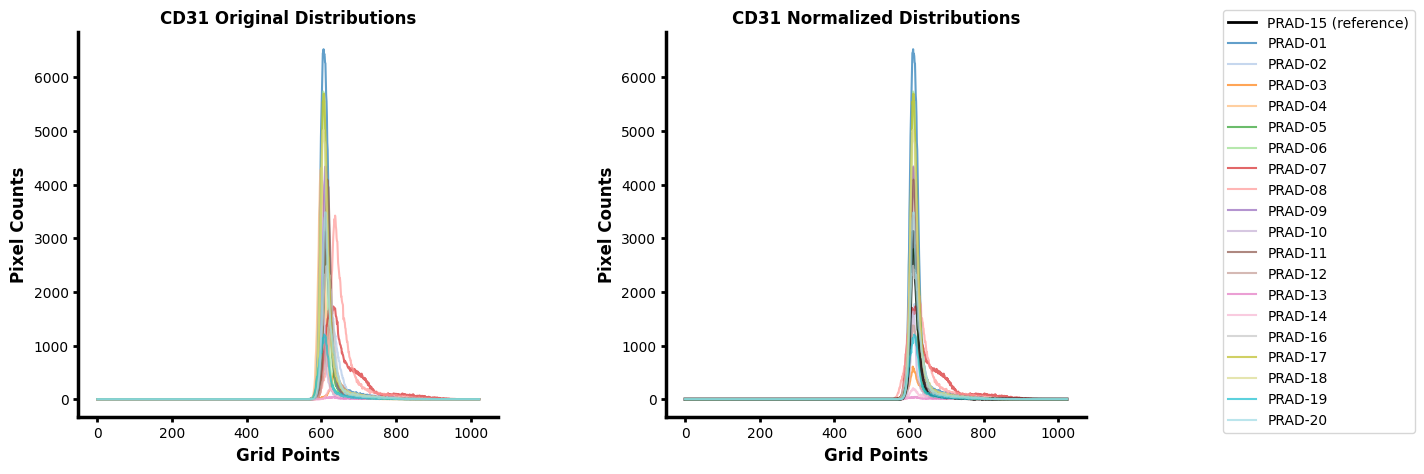


-------------------- Processing marker 'CD45RA' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-04' by histogram proximity 

✨ Computed shifts: [28, 17, 3, 0, 23, 20, 15, 13, 4, -28, 8, -28, -7, 0, -5, 32, 10, -3, -11, -23]
✨ Auto-computed reference landmark for 'CD45RA' on 'PRAD-04': 797
✨ Implied landmark positions for 'CD45RA': [825, 814, 800, 797, 820, 817, 812, 810, 801, 769, 805, 769, 790, 797, 792, 829, 807, 794, 786, 774]


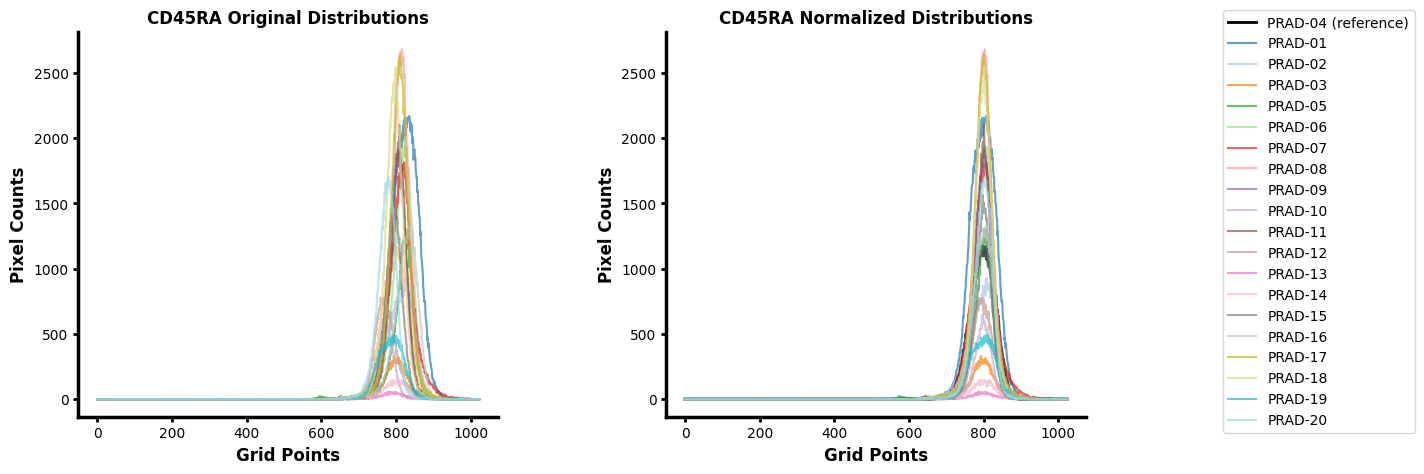


-------------------- Processing marker 'HLADRB1' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-15' by histogram proximity 

✨ Computed shifts: [0, -8, -12, -12, -7, 23, -1, 58, 4, 6, 21, -11, 5, -5, 0, 5, -6, 11, -14, 4]
✨ Auto-computed reference landmark for 'HLADRB1' on 'PRAD-15': 595
✨ Implied landmark positions for 'HLADRB1': [595, 587, 583, 583, 588, 618, 594, 653, 599, 601, 616, 584, 600, 590, 595, 600, 589, 606, 581, 599]


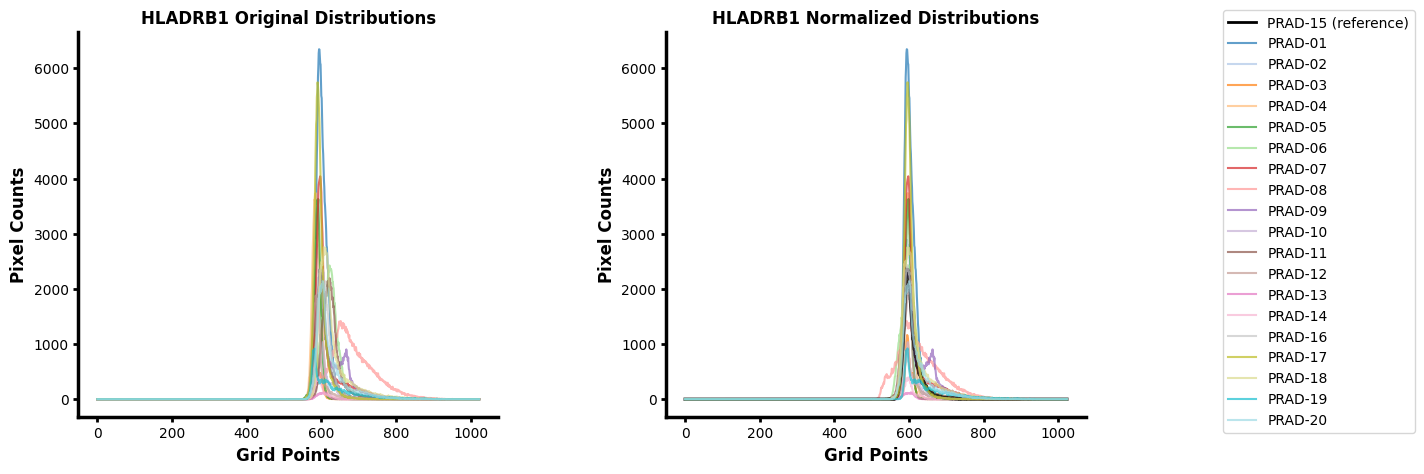


-------------------- Processing marker 'CD3' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-19' by histogram proximity 

✨ Computed shifts: [-2, -56, -54, -2, -56, 6, -17, -6, -51, -49, 23, -17, 11, -4, 3, -2, 7, 15, 0, -48]
✨ Auto-computed reference landmark for 'CD3' on 'PRAD-19': 716
✨ Implied landmark positions for 'CD3': [714, 660, 662, 714, 660, 722, 699, 710, 665, 667, 739, 699, 727, 712, 719, 714, 723, 731, 716, 668]


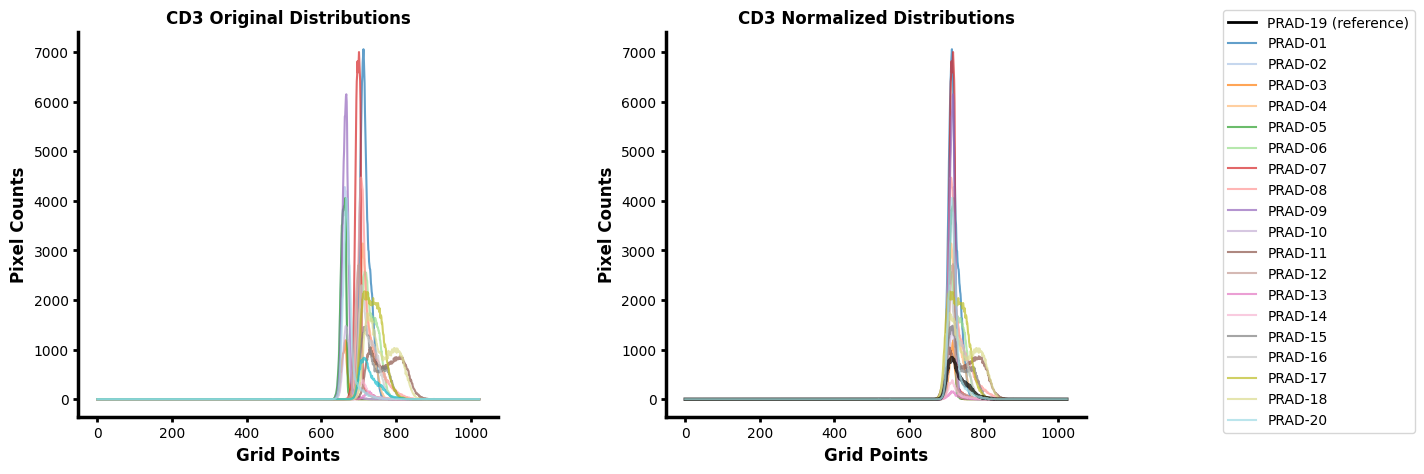


-------------------- Processing marker 'p53' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-04' by histogram proximity 

✨ Computed shifts: [24, 20, 0, 0, 19, 15, -4, 3, -2, -28, 22, -30, -14, 2, -30, 15, -12, -18, -28, -24]
✨ Auto-computed reference landmark for 'p53' on 'PRAD-04': 794
✨ Implied landmark positions for 'p53': [818, 814, 794, 794, 813, 809, 790, 797, 792, 766, 816, 764, 780, 796, 764, 809, 782, 776, 766, 770]


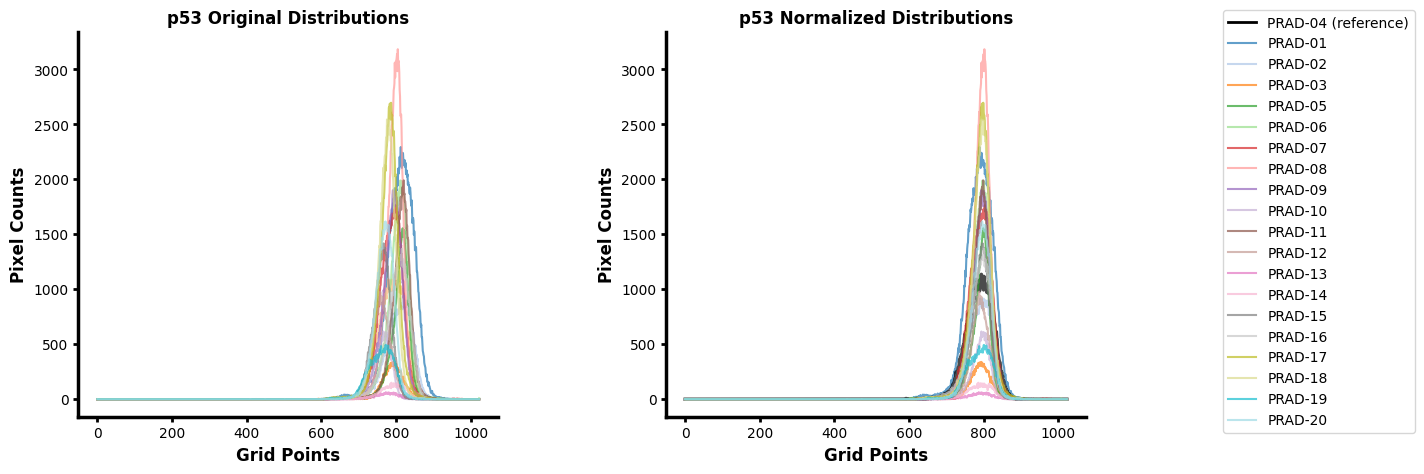


-------------------- Processing marker 'FOXA1' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-16' by histogram proximity 

✨ Computed shifts: [1, 2, 5, -7, 13, 4, -3, -1, 3, -1, 63, -11, 22, 24, -11, 0, -5, -7, -15, -2]
✨ Auto-computed reference landmark for 'FOXA1' on 'PRAD-16': 637
✨ Implied landmark positions for 'FOXA1': [638, 639, 642, 630, 650, 641, 634, 636, 640, 636, 700, 626, 659, 661, 626, 637, 632, 630, 622, 635]


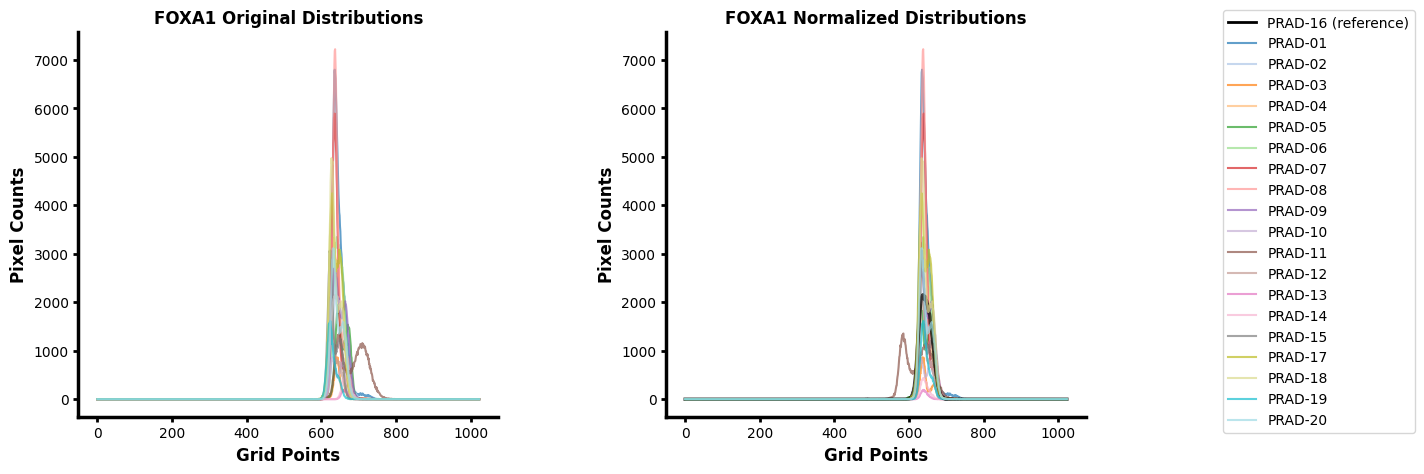


-------------------- Processing marker 'CDX2' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [42, 0, -35, -10, -10, 9, -38, -40, 185, 153, -26, -106, -81, -37, -73, 15, -51, -56, -67, 203]
✨ Auto-computed reference landmark for 'CDX2' on 'PRAD-02': 652
✨ Implied landmark positions for 'CDX2': [694, 652, 617, 642, 642, 661, 614, 612, 837, 805, 626, 546, 571, 615, 579, 667, 601, 596, 585, 855]


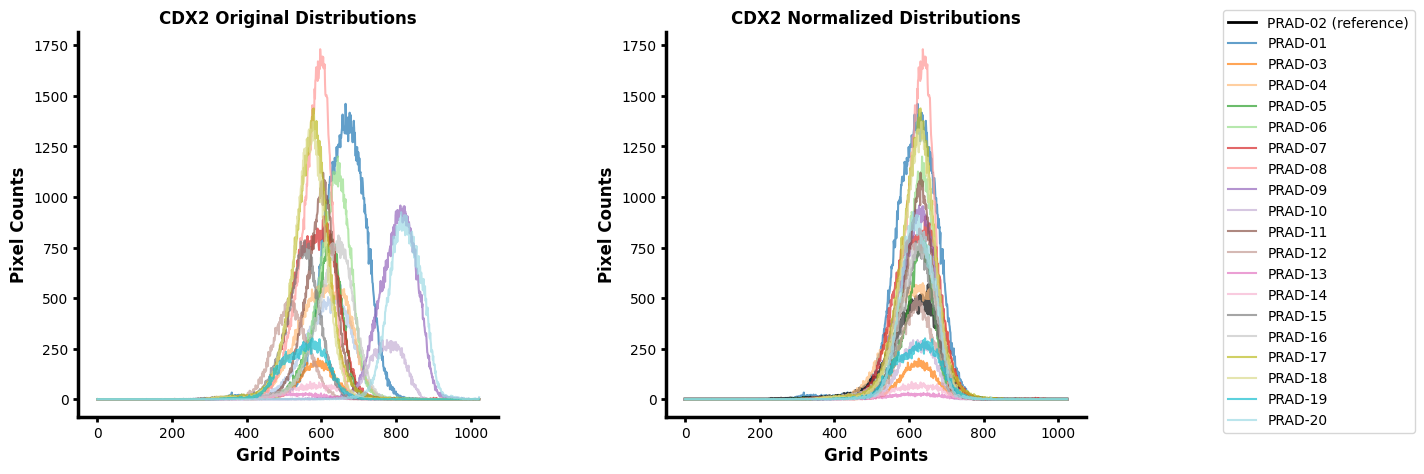


-------------------- Processing marker 'CD20' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-02' by histogram proximity 

✨ Computed shifts: [12, 0, -2, 0, 1, 8, -10, 16, 93, 153, 10, -18, 10, 15, -14, 5, -11, -4, -14, 177]
✨ Auto-computed reference landmark for 'CD20' on 'PRAD-02': 379
✨ Implied landmark positions for 'CD20': [391, 379, 377, 379, 380, 387, 369, 395, 472, 532, 389, 361, 389, 394, 365, 384, 368, 375, 365, 556]


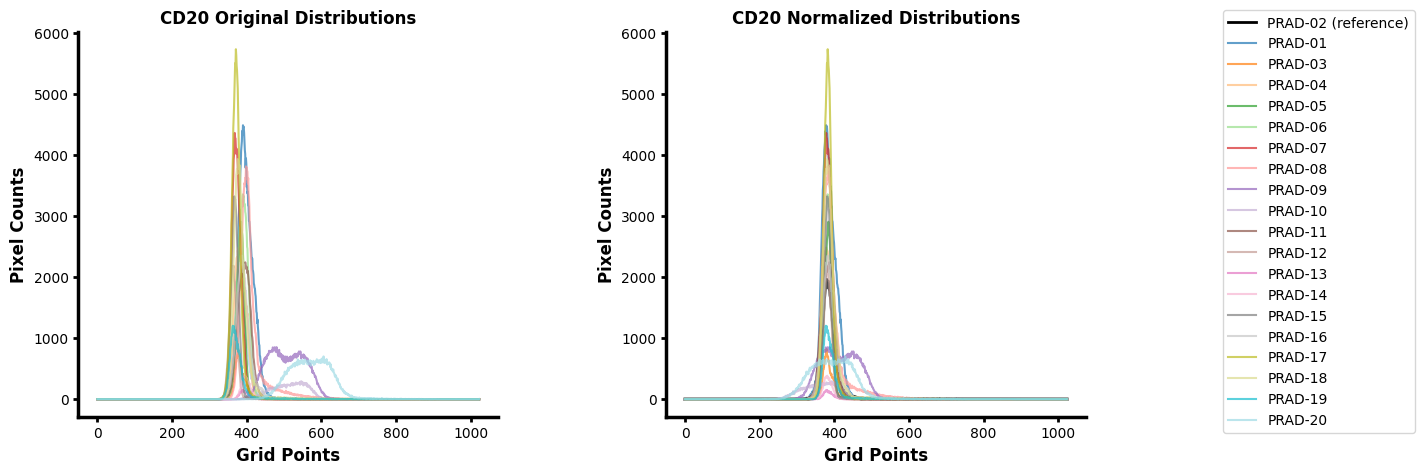


-------------------- Processing marker 'NOTCH1' --------------------
☑️ No reference provided → will select by proximity
☑️ No landmarks → automatic alignment to mean, selecting 'PRAD-15' by histogram proximity 

✨ Computed shifts: [7, -3, 3, 4, 1, 8, -1, -1, -13, -7, 28, -6, 0, 0, 0, 2, 0, 4, -2, -26]
✨ Auto-computed reference landmark for 'NOTCH1' on 'PRAD-15': 510
✨ Implied landmark positions for 'NOTCH1': [517, 507, 513, 514, 511, 518, 509, 509, 497, 503, 538, 504, 510, 510, 510, 512, 510, 514, 508, 484]


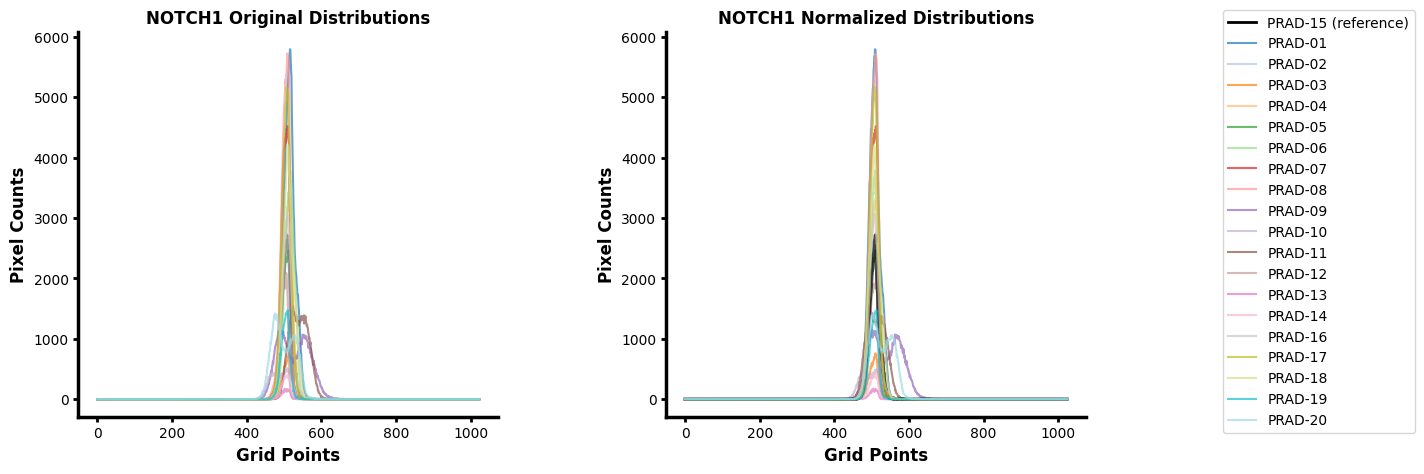

In [6]:
shifts_map, chosen_references, implied_landmarks_map = automatic_registration(
    histogram_data       = histograms,
    all_markers          = PRAD_markers,
    selected_markers     = PRAD_markers,
    sample_ids           = PRAD_sample_names,
    reference_samples    = None,
    landmark_map         = None,
    num_bins             = 1024,
    dpi                  = 100,
    x_limits             = None
)

# 4. Perform Landmark Finetuning (optional depending on the alignment results)

In [7]:
landmark_refinement(
    histogram_data        = histograms,
    gmm_models            = gmm_models,
    markers               = PRAD_markers,
    sample_ids            = PRAD_sample_names,
    data_source           = None,
    num_bins              = 1024,
    dpi                   = 100,
    x_limits              = None,               # or None
    group_size            = 4,
    implied_landmarks_map = implied_landmarks_map,
    verbose               = True,                # show prints & tqdm
    output_directory      = "landmark_picking_pickle"
)


HTML files:   0%|                                                                                                | 0/5 [00:00<?, ?it/s]

Processing samples PRAD-01 to PRAD-04
  Marker: DAPI_R1
  Marker: EPCAM
  Marker: CD56
  Marker: CD45
  Marker: aSMA
  Marker: ChromA
  Marker: CK14
  Marker: Ki67
  Marker: GZMB
  Marker: ECAD
  Marker: PD1
  Marker: CD31
  Marker: CD45RA
  Marker: HLADRB1
  Marker: CD3
  Marker: p53
  Marker: FOXA1
  Marker: CDX2
  Marker: CD20


HTML files:  20%|█████████████████▌                                                                      | 1/5 [00:01<00:04,  1.01s/it]

  Marker: NOTCH1
Processing samples PRAD-05 to PRAD-08
  Marker: DAPI_R1
  Marker: EPCAM
  Marker: CD56
  Marker: CD45
  Marker: aSMA
  Marker: ChromA
  Marker: CK14
  Marker: Ki67
  Marker: GZMB
  Marker: ECAD
  Marker: PD1
  Marker: CD31
  Marker: CD45RA
  Marker: HLADRB1
  Marker: CD3
  Marker: p53
  Marker: FOXA1
  Marker: CDX2
  Marker: CD20


HTML files:  40%|███████████████████████████████████▏                                                    | 2/5 [00:01<00:02,  1.14it/s]

  Marker: NOTCH1
Processing samples PRAD-09 to PRAD-12
  Marker: DAPI_R1
  Marker: EPCAM
  Marker: CD56
  Marker: CD45
  Marker: aSMA
  Marker: ChromA
  Marker: CK14
  Marker: Ki67
  Marker: GZMB
  Marker: ECAD
  Marker: PD1
  Marker: CD31
  Marker: CD45RA
  Marker: HLADRB1
  Marker: CD3
  Marker: p53
  Marker: FOXA1
  Marker: CDX2
  Marker: CD20
  Marker: NOTCH1


HTML files:  60%|████████████████████████████████████████████████████▊                                   | 3/5 [00:02<00:01,  1.25it/s]

Processing samples PRAD-13 to PRAD-16
  Marker: DAPI_R1
  Marker: EPCAM
  Marker: CD56
  Marker: CD45
  Marker: aSMA
  Marker: ChromA
  Marker: CK14
  Marker: Ki67
  Marker: GZMB
  Marker: ECAD
  Marker: PD1
  Marker: CD31
  Marker: CD45RA
  Marker: HLADRB1
  Marker: CD3
  Marker: p53
  Marker: FOXA1
  Marker: CDX2
  Marker: CD20


HTML files:  80%|██████████████████████████████████████████████████████████████████████▍                 | 4/5 [00:03<00:00,  1.32it/s]

  Marker: NOTCH1
Processing samples PRAD-17 to PRAD-20
  Marker: DAPI_R1
  Marker: EPCAM
  Marker: CD56
  Marker: CD45
  Marker: aSMA
  Marker: ChromA
  Marker: CK14
  Marker: Ki67
  Marker: GZMB
  Marker: ECAD
  Marker: PD1
  Marker: CD31
  Marker: CD45RA
  Marker: HLADRB1
  Marker: CD3
  Marker: p53
  Marker: FOXA1
  Marker: CDX2
  Marker: CD20


HTML files: 100%|████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.29it/s]

  Marker: NOTCH1
✅  All HTML files and landmark_annotations.csv saved to 'landmark_picking_pickle' folder


# 5. User's manual adjustment of landmark using the landmark_annotations.csv

In [8]:
import pandas as pd

# Load the CSV
landmark_df = pd.read_csv("landmark_picking/landmark_annotations_filled.csv", index_col=0)
sample_names = [col.replace("_landmark", "") for col in landmark_df.columns]
landmark = {}

for marker in landmark_df.index:
    row = landmark_df.loc[marker]
    if row.isna().all() or all(v == '' for v in row):
        landmark[marker] = None
    else:
        row_values = []
        for col in landmark_df.columns:
            value = landmark_df.loc[marker, col]
            if pd.isna(value) or value == '':
                row_values.append(None)
            else:
                row_values.append(int(value))  # Ensure integers
        landmark[marker] = row_values

# 6. After user's finetuning, let's check on the refined distribution alignment


-------------------- Processing marker 'DAPI_R1' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-11' closest to mean 739.35
✨ Computed shifts: [-87, -48, -75, 1, -132, -52, -40, -109, -100, -89, 0, -69, 32, 74, 87, 107, 96, 80, 109, -58]
✨ Auto-computed reference landmark for 'DAPI_R1' on 'PRAD-11': 753
✨ Implied landmark positions for 'DAPI_R1': [666, 705, 678, 754, 621, 701, 713, 644, 653, 664, 753, 684, 785, 827, 840, 860, 849, 833, 862, 695]


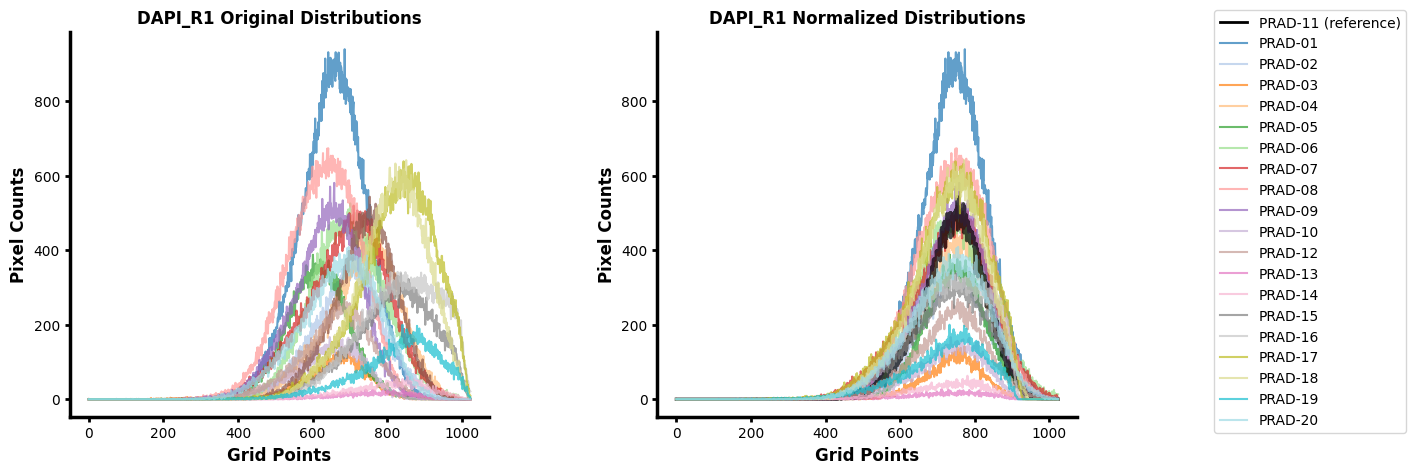


-------------------- Processing marker 'EPCAM' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-11' closest to mean 746.00
✨ Computed shifts: [61, -13, -24, 35, 30, 72, -66, -26, 19, -24, 0, -91, -29, -1, 7, 64, 22, 11, -16, -31]
✨ Auto-computed reference landmark for 'EPCAM' on 'PRAD-11': 758
✨ Implied landmark positions for 'EPCAM': [819, 745, 734, 793, 788, 830, 692, 732, 777, 734, 758, 667, 729, 757, 765, 822, 780, 769, 742, 727]


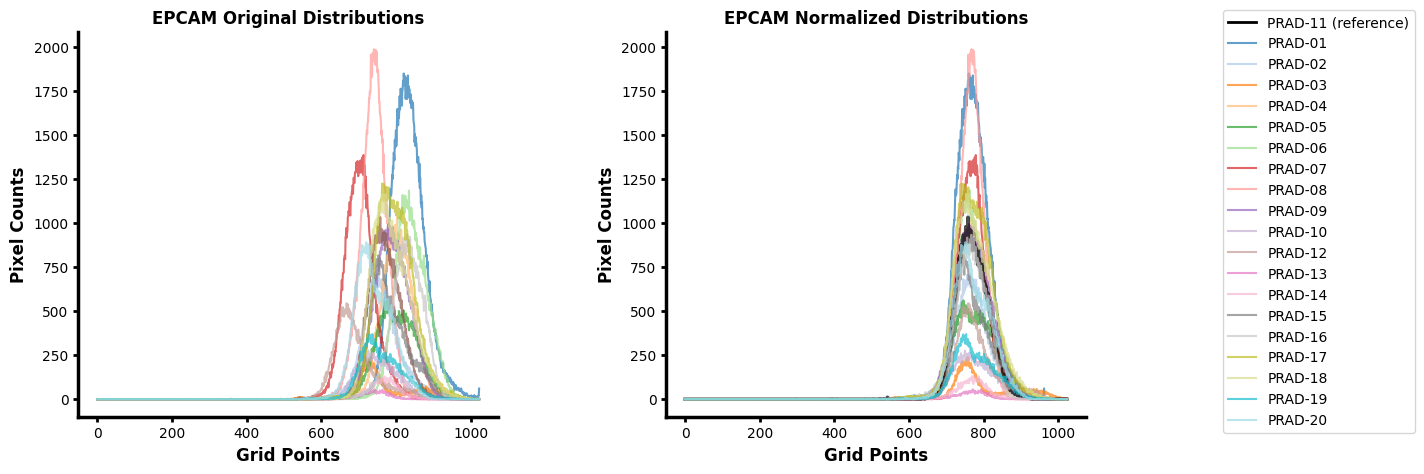


-------------------- Processing marker 'CD56' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-01' closest to mean 833.55
✨ Computed shifts: [0, 12, 0, -25, 15, -4, -20, 0, 32, 10, 6, -56, -16, 5, -5, 50, 11, 10, 8, -2]
✨ Auto-computed reference landmark for 'CD56' on 'PRAD-01': 832
✨ Implied landmark positions for 'CD56': [832, 844, 832, 807, 847, 828, 812, 832, 864, 842, 838, 776, 816, 837, 827, 882, 843, 842, 840, 830]


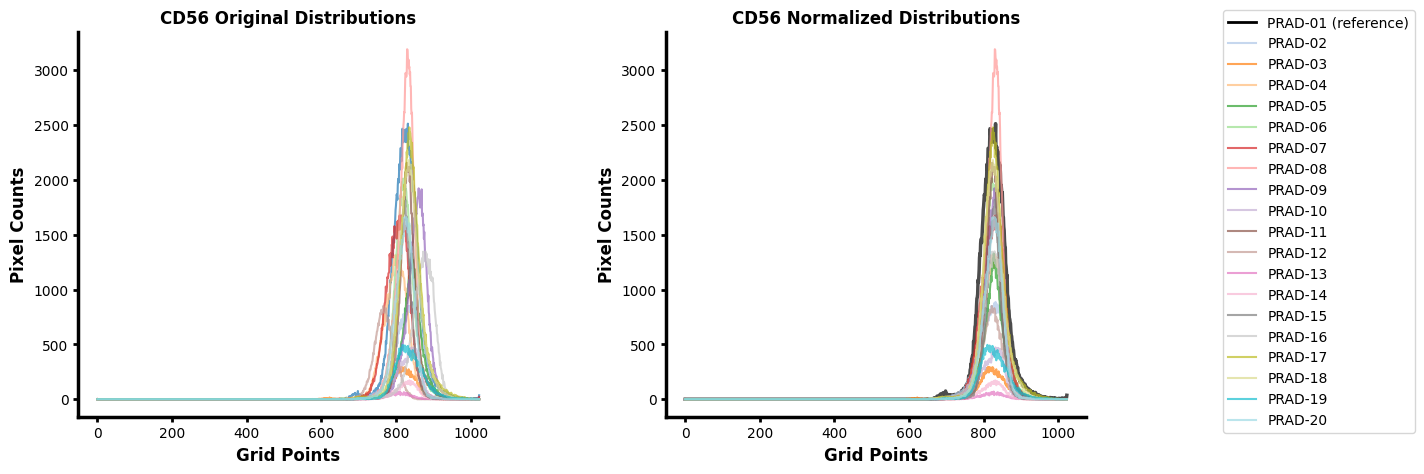


-------------------- Processing marker 'CD45' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-17' closest to mean 668.70
✨ Computed shifts: [63, -37, -35, 46, -35, 49, -18, -16, 48, 63, 65, -10, -31, -32, -27, -10, 0, -5, -11, 67]
✨ Auto-computed reference landmark for 'CD45' on 'PRAD-17': 669
✨ Implied landmark positions for 'CD45': [732, 632, 634, 715, 634, 718, 651, 653, 717, 732, 734, 659, 638, 637, 642, 659, 669, 664, 658, 736]


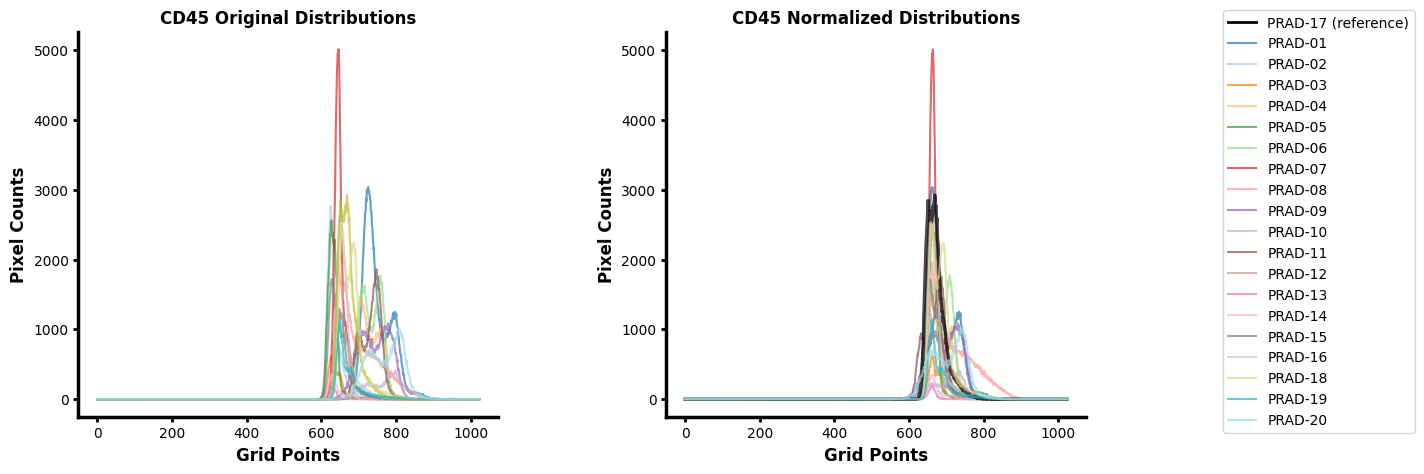


-------------------- Processing marker 'aSMA' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-03' closest to mean 697.85
✨ Computed shifts: [13, 10, 0, -8, -10, -4, -34, -10, -5, -42, -24, -64, -62, -19, 74, 102, 72, 68, 72, -32]
✨ Auto-computed reference landmark for 'aSMA' on 'PRAD-03': 696
✨ Implied landmark positions for 'aSMA': [709, 706, 696, 688, 686, 692, 662, 686, 691, 654, 672, 632, 634, 677, 770, 798, 768, 764, 768, 664]


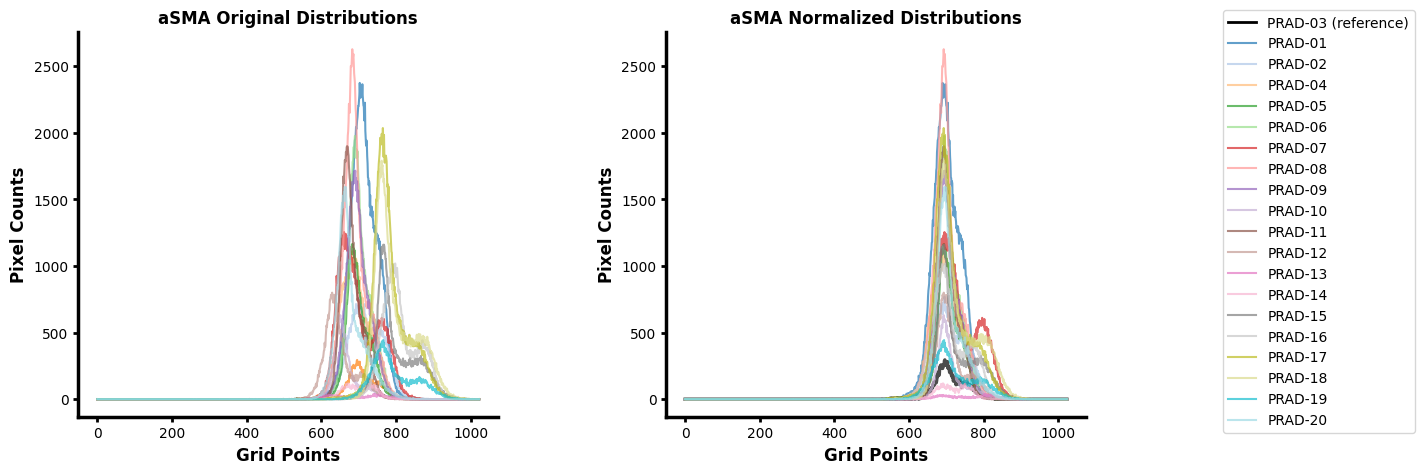


-------------------- Processing marker 'ChromA' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-11' closest to mean 498.00
✨ Computed shifts: [-5, -4, -2, -5, -4, -4, -2, -4, -4, -5, 0, -5, 174, 178, 82, 82, 86, 84, 82, -4]
✨ Auto-computed reference landmark for 'ChromA' on 'PRAD-11': 461
✨ Implied landmark positions for 'ChromA': [456, 457, 459, 456, 457, 457, 459, 457, 457, 456, 461, 456, 635, 639, 543, 543, 547, 545, 543, 457]


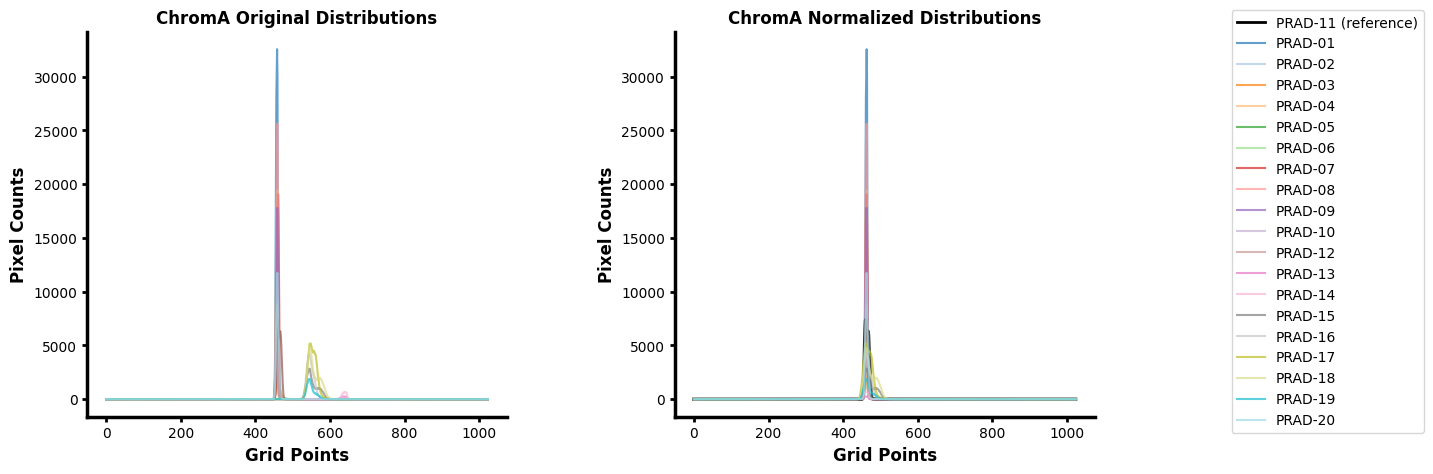


-------------------- Processing marker 'CK14' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-19' closest to mean 804.00
✨ Computed shifts: [15, 7, 3, -9, 9, 11, -6, -7, 16, -2, 13, -51, -29, -5, -6, 33, 3, 9, 0, -4]
✨ Auto-computed reference landmark for 'CK14' on 'PRAD-19': 808
✨ Implied landmark positions for 'CK14': [823, 815, 811, 799, 817, 819, 802, 801, 824, 806, 821, 757, 779, 803, 802, 841, 811, 817, 808, 804]


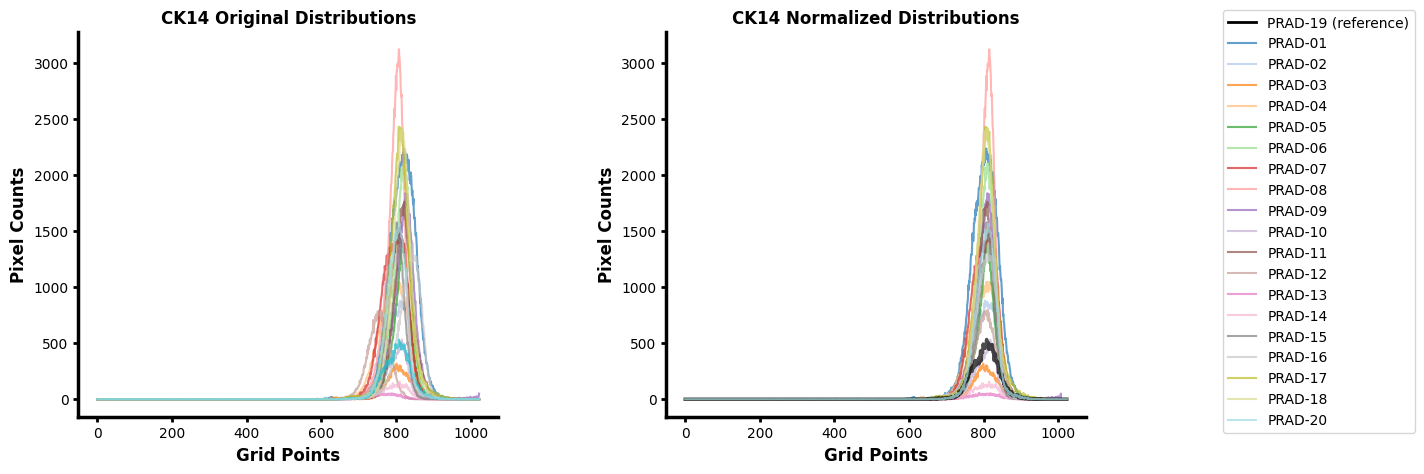


-------------------- Processing marker 'Ki67' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-08' closest to mean 601.70
✨ Computed shifts: [-4, -1, -1, -8, 2, 2, -5, 0, 8, 8, 36, -9, -14, -10, -6, 9, -2, 0, -10, -1]
✨ Auto-computed reference landmark for 'Ki67' on 'PRAD-08': 602
✨ Implied landmark positions for 'Ki67': [598, 601, 601, 594, 604, 604, 597, 602, 610, 610, 638, 593, 588, 592, 596, 611, 600, 602, 592, 601]


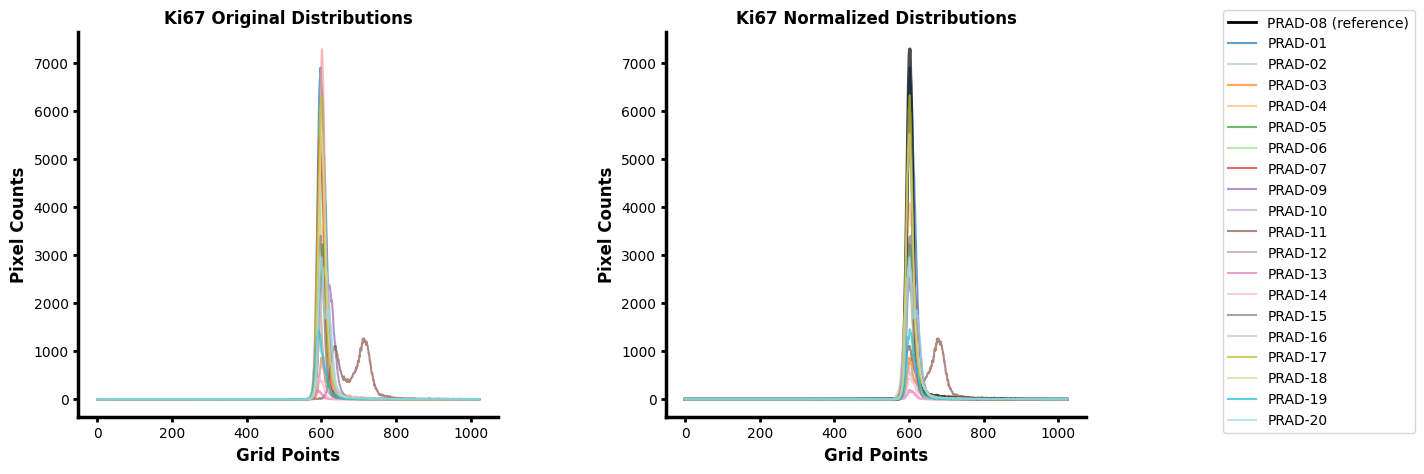


-------------------- Processing marker 'GZMB' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-09' closest to mean 829.00
✨ Computed shifts: [18, 11, -7, -9, 7, 6, -9, -9, 0, -37, 66, -46, -17, 7, -7, 32, 2, 4, -4, -28]
✨ Auto-computed reference landmark for 'GZMB' on 'PRAD-09': 820
✨ Implied landmark positions for 'GZMB': [838, 831, 813, 811, 827, 826, 811, 811, 820, 783, 886, 774, 803, 827, 813, 852, 822, 824, 816, 792]


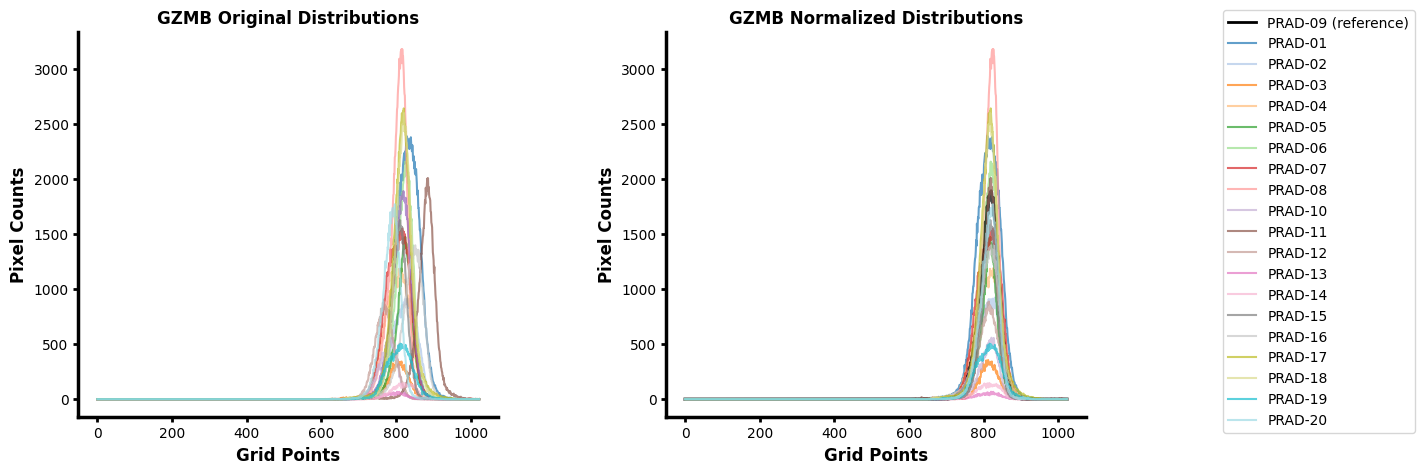


-------------------- Processing marker 'ECAD' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-06' closest to mean 570.15
✨ Computed shifts: [-9, -8, -7, -23, -2, 0, 23, 34, 46, 30, 19, 13, -26, -16, -8, 17, -7, -6, -21, 34]
✨ Auto-computed reference landmark for 'ECAD' on 'PRAD-06': 566
✨ Implied landmark positions for 'ECAD': [557, 558, 559, 543, 564, 566, 589, 600, 612, 596, 585, 579, 540, 550, 558, 583, 559, 560, 545, 600]


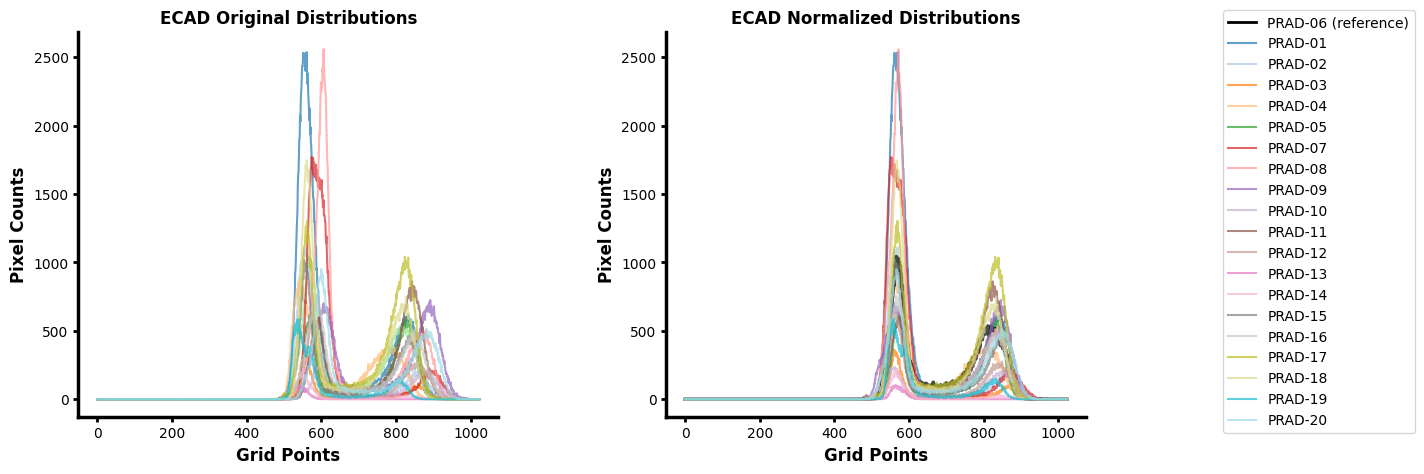


-------------------- Processing marker 'PD1' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-16' closest to mean 667.60
✨ Computed shifts: [-17, -9, -10, -19, -6, -11, 10, 15, 21, 11, 16, 9, 56, 30, -16, 0, -11, -12, -22, 17]
✨ Auto-computed reference landmark for 'PD1' on 'PRAD-16': 665
✨ Implied landmark positions for 'PD1': [648, 656, 655, 646, 659, 654, 675, 680, 686, 676, 681, 674, 721, 695, 649, 665, 654, 653, 643, 682]


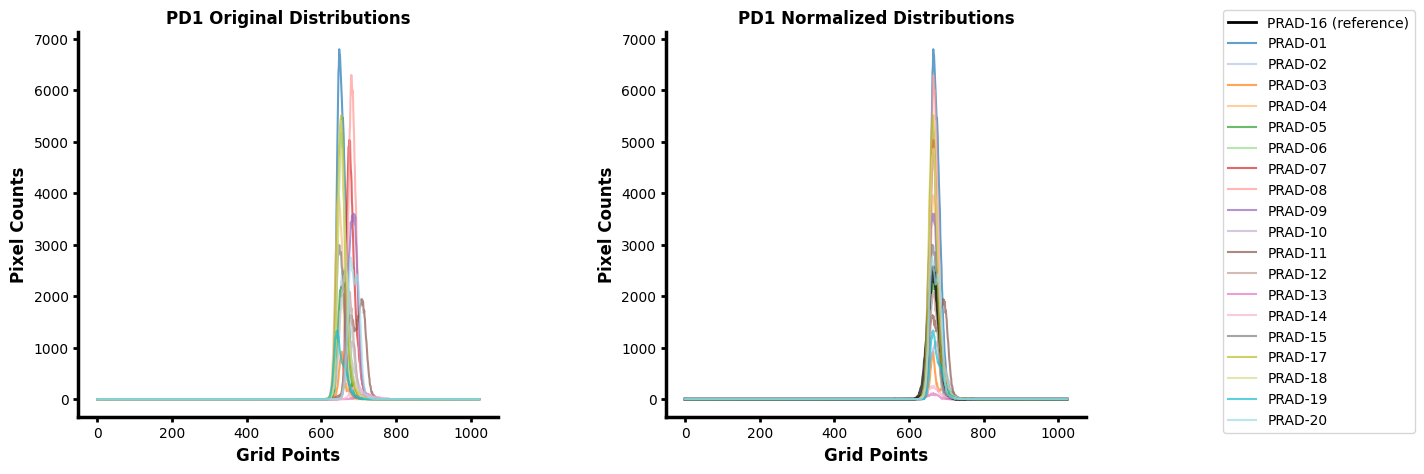


-------------------- Processing marker 'CD31' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-11' closest to mean 614.75
✨ Computed shifts: [-9, 6, 22, -16, -2, -10, 11, 22, -5, -11, 0, 5, 11, 9, -4, -1, -9, -9, -10, -5]
✨ Auto-computed reference landmark for 'CD31' on 'PRAD-11': 616
✨ Implied landmark positions for 'CD31': [607, 622, 638, 600, 614, 606, 627, 638, 611, 605, 616, 621, 627, 625, 612, 615, 607, 607, 606, 611]


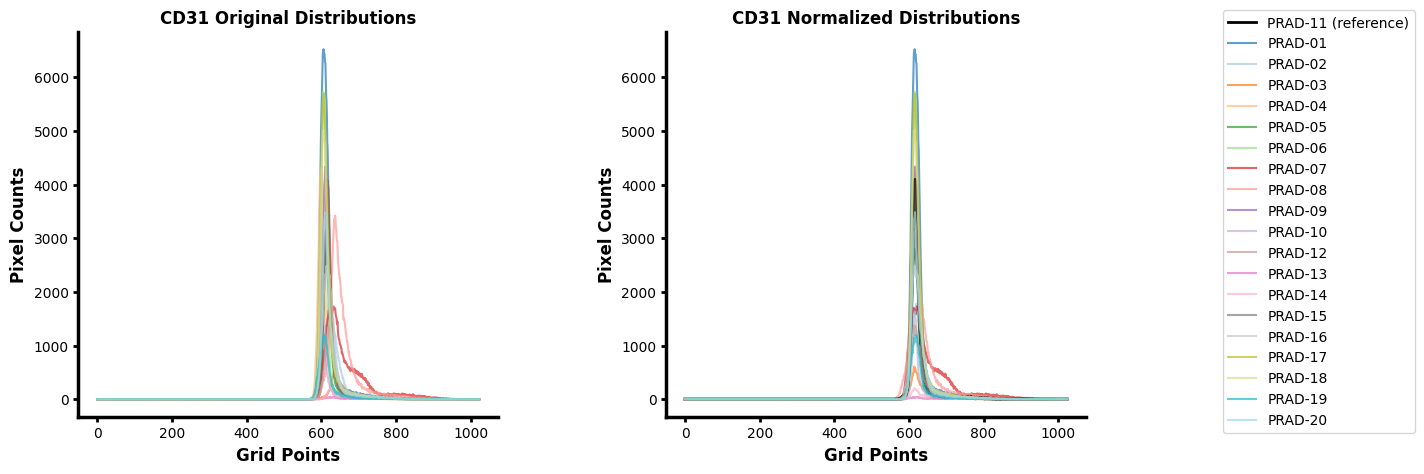


-------------------- Processing marker 'CD45RA' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-03' closest to mean 800.40
✨ Computed shifts: [25, 14, 0, -3, 20, 17, 12, 10, 1, -31, 5, -31, -10, -3, -8, 29, 7, -6, -14, -26]
✨ Auto-computed reference landmark for 'CD45RA' on 'PRAD-03': 796
✨ Implied landmark positions for 'CD45RA': [821, 810, 796, 793, 816, 813, 808, 806, 797, 765, 801, 765, 786, 793, 788, 825, 803, 790, 782, 770]


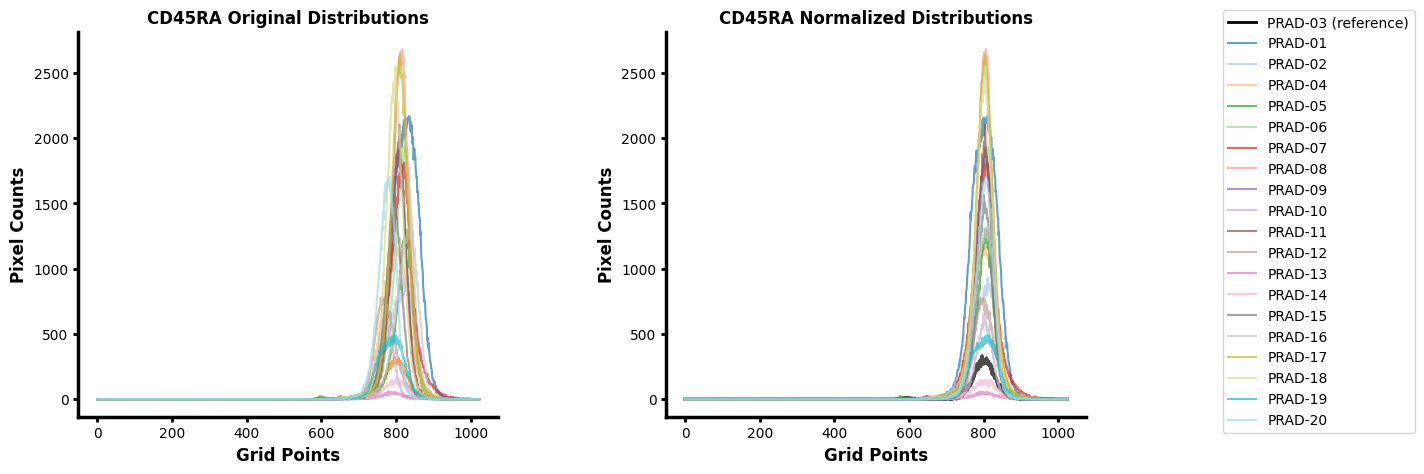


-------------------- Processing marker 'HLADRB1' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-09' closest to mean 599.30
✨ Computed shifts: [-6, -13, -17, -16, -10, 22, -4, 48, 0, 2, 22, -13, 1, -7, -3, 0, -10, 8, -19, 1]
✨ Auto-computed reference landmark for 'HLADRB1' on 'PRAD-09': 601
✨ Implied landmark positions for 'HLADRB1': [595, 588, 584, 585, 591, 623, 597, 649, 601, 603, 623, 588, 602, 594, 598, 601, 591, 609, 582, 602]


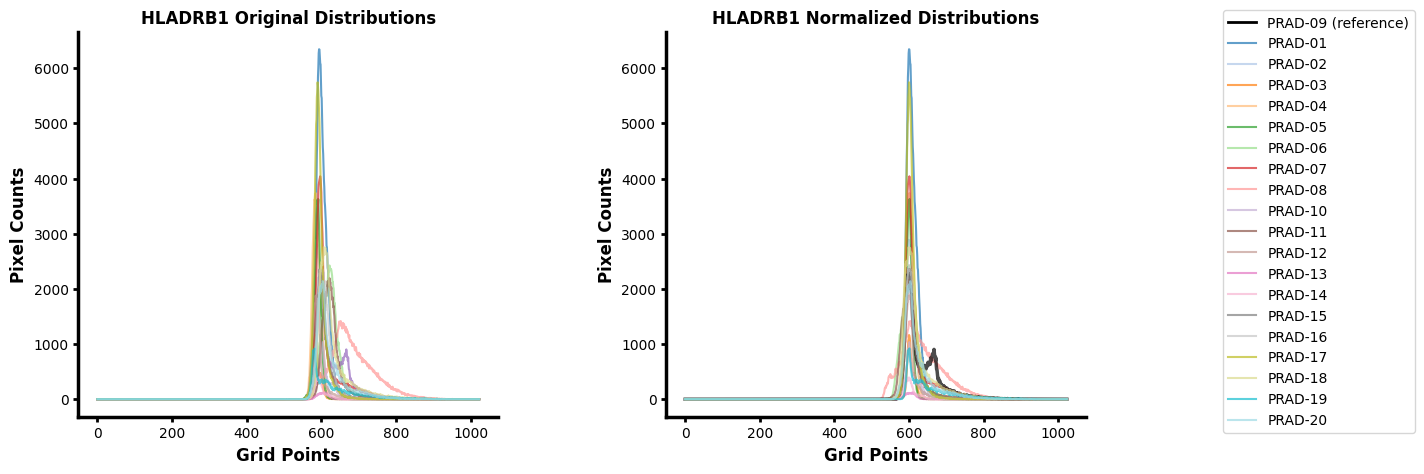


-------------------- Processing marker 'CD3' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-07' closest to mean 701.05
✨ Computed shifts: [15, -39, -37, 15, -39, 23, 0, 11, -34, -32, 40, 0, 28, 13, 20, 15, 24, 32, 17, -31]
✨ Auto-computed reference landmark for 'CD3' on 'PRAD-07': 701
✨ Implied landmark positions for 'CD3': [716, 662, 664, 716, 662, 724, 701, 712, 667, 669, 741, 701, 729, 714, 721, 716, 725, 733, 718, 670]


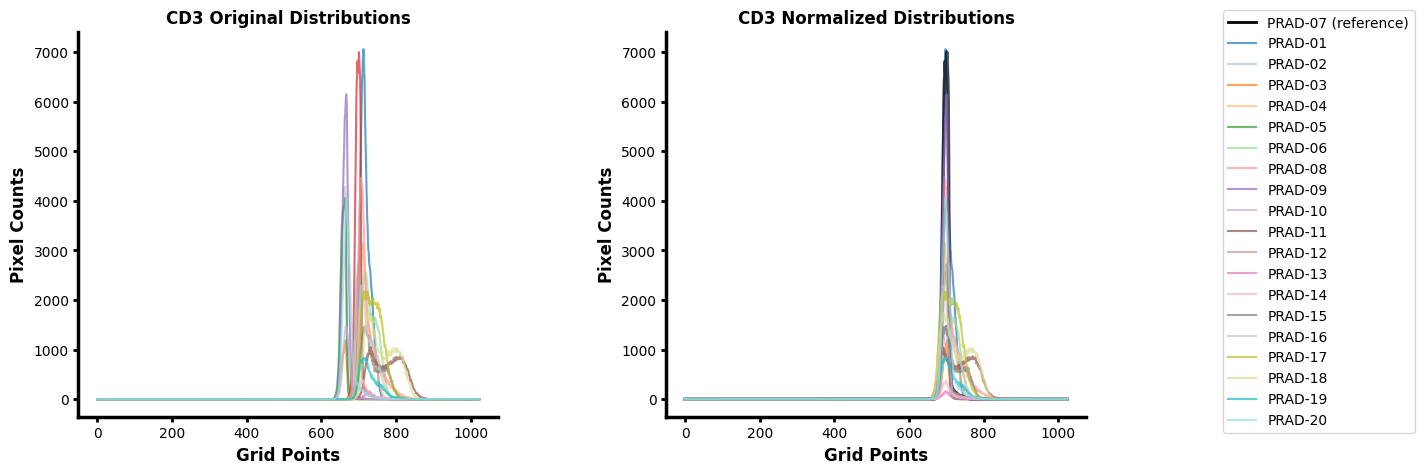


-------------------- Processing marker 'p53' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-07' closest to mean 790.50
✨ Computed shifts: [28, 24, 4, 4, 23, 19, 0, 7, 2, -24, 26, -26, -10, 6, -26, 19, -8, -14, -24, -20]
✨ Auto-computed reference landmark for 'p53' on 'PRAD-07': 799
✨ Implied landmark positions for 'p53': [827, 823, 803, 803, 822, 818, 799, 806, 801, 775, 825, 773, 789, 805, 773, 818, 791, 785, 775, 779]


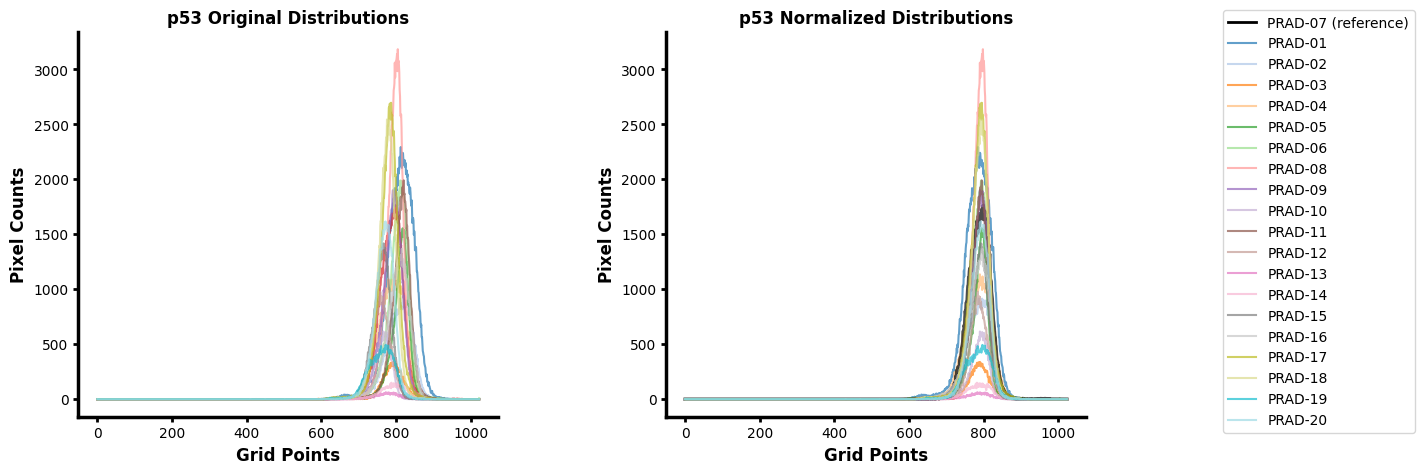


-------------------- Processing marker 'FOXA1' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-01' closest to mean 636.40
✨ Computed shifts: [0, 2, 5, -5, 8, 4, -2, 0, 0, -6, 12, -12, 24, 27, -14, 1, -8, -9, -14, -5]
✨ Auto-computed reference landmark for 'FOXA1' on 'PRAD-01': 636
✨ Implied landmark positions for 'FOXA1': [636, 638, 641, 631, 644, 640, 634, 636, 636, 630, 648, 624, 660, 663, 622, 637, 628, 627, 622, 631]


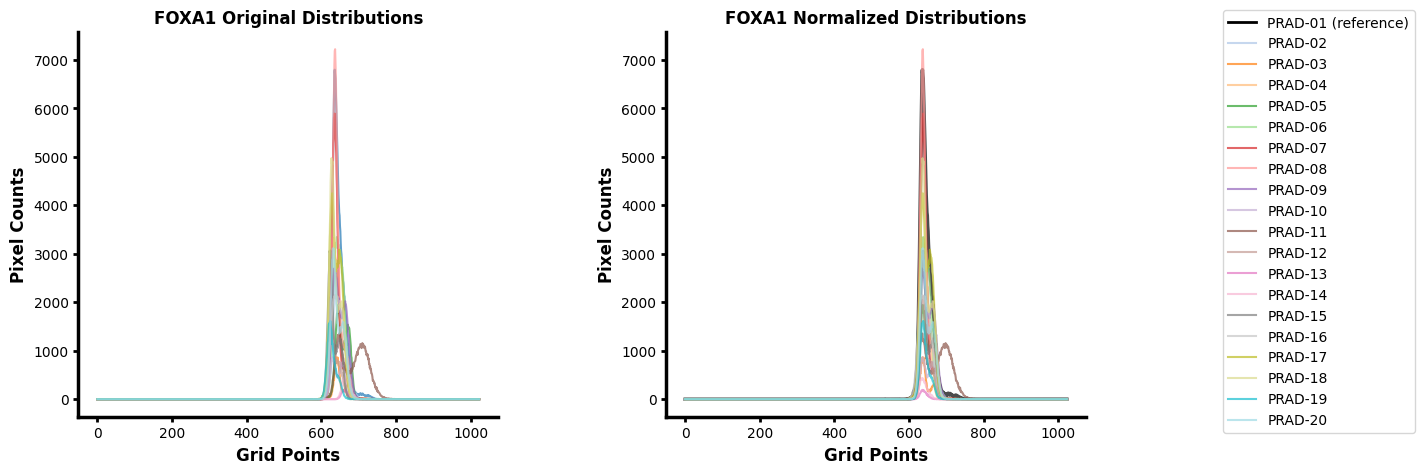


-------------------- Processing marker 'CDX2' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-02' closest to mean 650.85
✨ Computed shifts: [42, 0, -35, -10, -10, 9, -38, -40, 185, 153, -26, -106, -81, -37, -73, 15, -51, -56, -67, 203]
✨ Auto-computed reference landmark for 'CDX2' on 'PRAD-02': 652
✨ Implied landmark positions for 'CDX2': [694, 652, 617, 642, 642, 661, 614, 612, 837, 805, 626, 546, 571, 615, 579, 667, 601, 596, 585, 855]


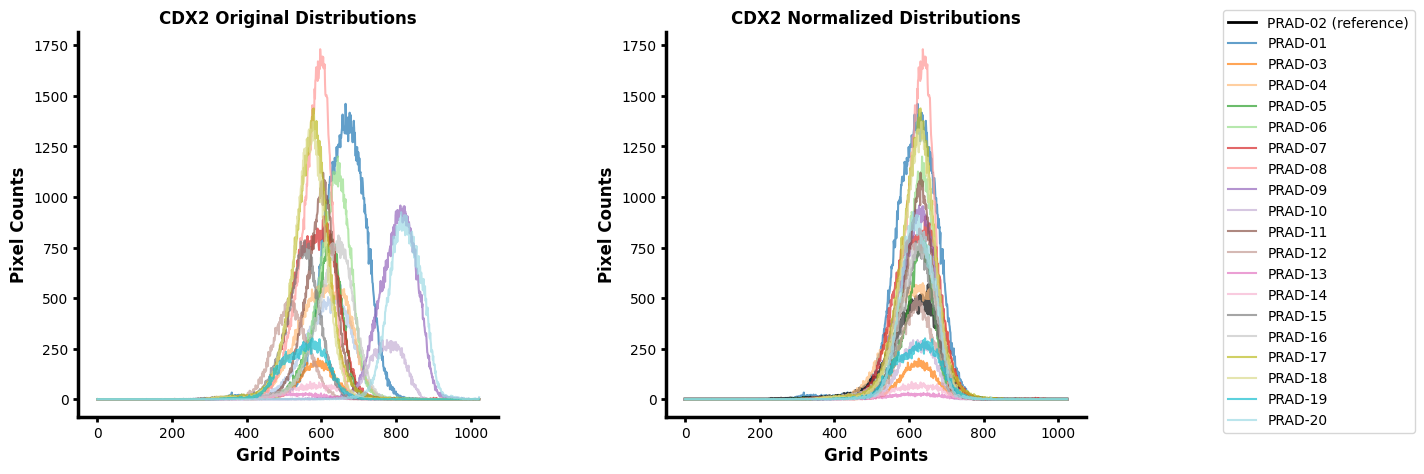


-------------------- Processing marker 'CD20' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-11' closest to mean 397.50
✨ Computed shifts: [-6, -15, -19, -16, -11, -8, -26, 4, 78, 76, 0, -33, -8, -1, -29, -9, -25, -19, -32, 129]
✨ Auto-computed reference landmark for 'CD20' on 'PRAD-11': 396
✨ Implied landmark positions for 'CD20': [390, 381, 377, 380, 385, 388, 370, 400, 474, 472, 396, 363, 388, 395, 367, 387, 371, 377, 364, 525]


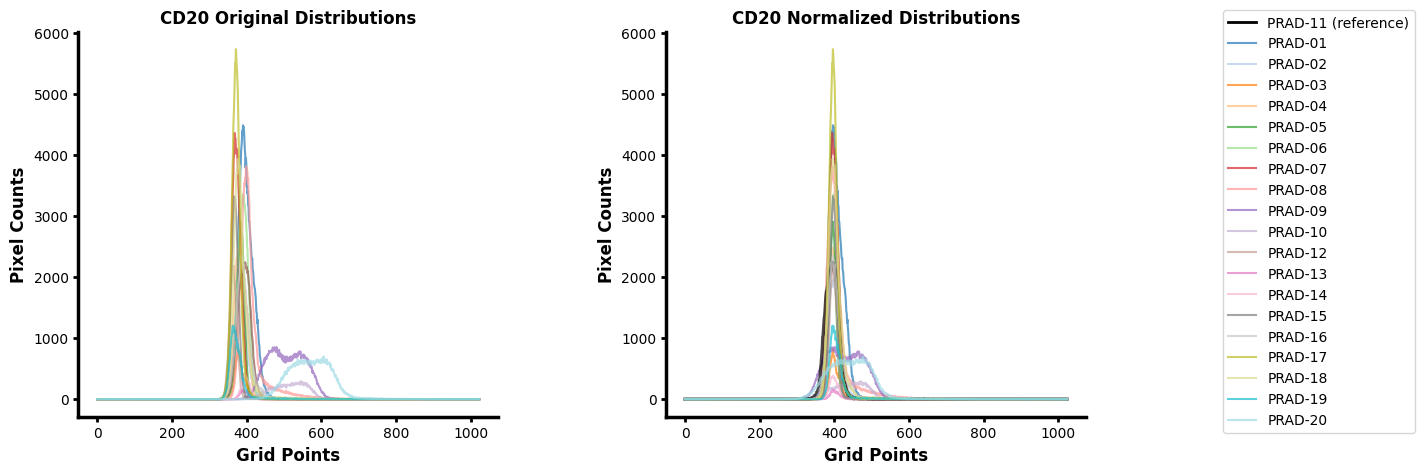


-------------------- Processing marker 'NOTCH1' --------------------
☑️ No reference provided → will select by proximity
✅ Landmarks provided → selected 'PRAD-13' closest to mean 509.90
✨ Computed shifts: [7, -3, 3, 4, 1, 8, -1, -1, -13, -7, 28, -6, 0, 0, 0, 2, 0, 4, -2, -26]
✨ Auto-computed reference landmark for 'NOTCH1' on 'PRAD-13': 504
✨ Implied landmark positions for 'NOTCH1': [511, 501, 507, 508, 505, 512, 503, 503, 491, 497, 532, 498, 504, 504, 504, 506, 504, 508, 502, 478]


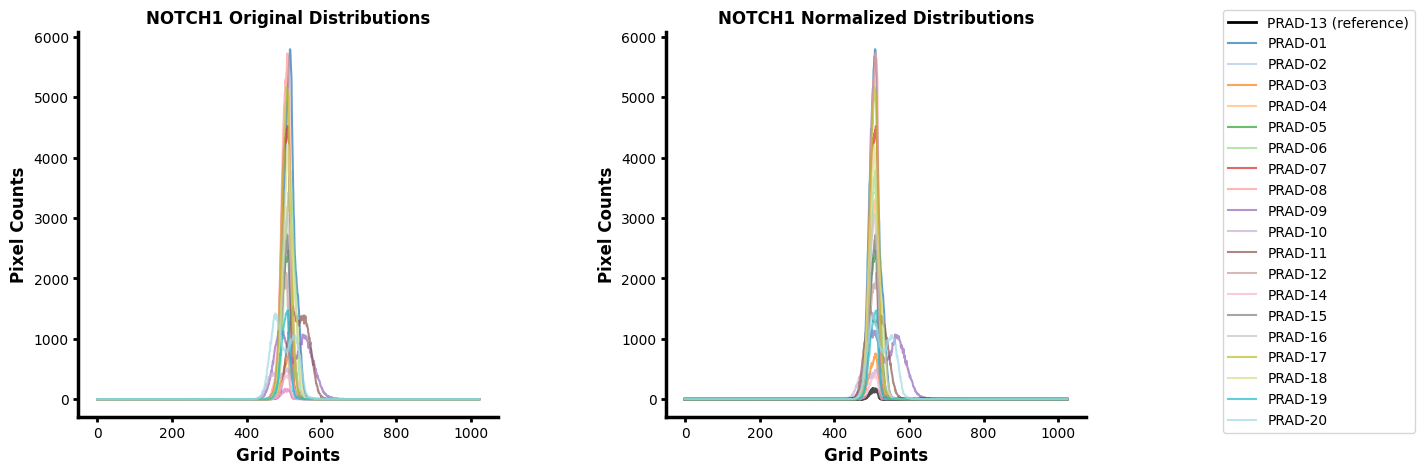

In [9]:
shifts_map, chosen_references, implied_landmarks_map = automatic_registration(
    histogram_data       = histograms,
    all_markers          = PRAD_markers,
    selected_markers     = PRAD_markers,
    sample_ids           = PRAD_sample_names,
    reference_samples    = None,
    landmark_map         = landmark,
    num_bins             = 1024,
    dpi                  = 100,
    x_limits             = None
)

# 7. Generate the normalized data using the finetuned scale factors

In [10]:
generate_normalized_feature(
    feature_input            = feature_data,
    sample_ids               = PRAD_sample_names,
    markers                  = PRAD_markers,
    intensity_ranges         = intensity_ranges,
    shifts_map               = shifts_map,
    chosen_references        = chosen_references,
    num_bins                 = 1024,
    dpi                      = 100,
    plot_dist                = False,
    plot_single_cell_corr    = False,
    gmm_analysis             = False,
    save_normalized_features = True
)

##############################Performing feature normalization##############################



Samples:   0%|                                                                                                  | 0/20 [00:00<?, ?it/s]

******************************  Normalizing PRAD-01 ******************************
⏳ DAPI_R1 ...
⏳ Normalizing DAPI_R1 | reference=PRAD-11 | scale factor=1.4337800821369557
⏳ EPCAM ...
⏳ Normalizing EPCAM | reference=PRAD-11 | scale factor=0.5912369135051241
⏳ CD56 ...
⏳ Normalizing CD56 | reference=PRAD-01 | scale factor=1.0
⏳ CD45 ...
⏳ Normalizing CD45 | reference=PRAD-17 | scale factor=0.5100231208248418
⏳ aSMA ...
⏳ Normalizing aSMA | reference=PRAD-03 | scale factor=0.871423227886559
⏳ ChromA ...
⏳ Normalizing ChromA | reference=PRAD-11 | scale factor=1.0552220171210678
⏳ CK14 ...
⏳ Normalizing CK14 | reference=PRAD-19 | scale factor=0.8618441624947031
⏳ Ki67 ...
⏳ Normalizing Ki67 | reference=PRAD-08 | scale factor=1.0430679830632554
⏳ GZMB ...
⏳ Normalizing GZMB | reference=PRAD-09 | scale factor=0.8238520665551762
⏳ ECAD ...
⏳ Normalizing ECAD | reference=PRAD-06 | scale factor=1.0939473514105784
⏳ PD1 ...
⏳ Normalizing PD1 | reference=PRAD-16 | scale factor=1.1889631401156733

Samples:  25%|██████████████████████▌                                                                   | 5/20 [00:00<00:00, 46.19it/s]

✅ Saved PRAD-02 normalized features to normalized_data_pickle/PRAD-02_normalized_feature.pkl
******************************  Normalizing PRAD-03 ******************************
⏳ DAPI_R1 ...
⏳ Normalizing DAPI_R1 | reference=PRAD-11 | scale factor=1.364265020077451
⏳ EPCAM ...
⏳ Normalizing EPCAM | reference=PRAD-11 | scale factor=1.2296987679558797
⏳ CD56 ...
⏳ Normalizing CD56 | reference=PRAD-01 | scale factor=1.0
⏳ CD45 ...
⏳ Normalizing CD45 | reference=PRAD-17 | scale factor=1.4536172743305324
⏳ aSMA ...
⏳ Normalizing aSMA | reference=PRAD-03 | scale factor=1.0
⏳ ChromA ...
⏳ Normalizing ChromA | reference=PRAD-11 | scale factor=1.0217332756838031
⏳ CK14 ...
⏳ Normalizing CK14 | reference=PRAD-19 | scale factor=0.9707016076142089
⏳ Ki67 ...
⏳ Normalizing Ki67 | reference=PRAD-08 | scale factor=1.010597346850476
⏳ GZMB ...
⏳ Normalizing GZMB | reference=PRAD-09 | scale factor=1.0782644758828461
⏳ ECAD ...
⏳ Normalizing ECAD | reference=PRAD-06 | scale factor=1.0723351693626766
⏳ PD

Samples:  55%|████████████████████████████████████████████████▉                                        | 11/20 [00:00<00:00, 53.92it/s]

⏳ Normalizing CDX2 | reference=PRAD-02 | scale factor=1.1526924618746868
⏳ CD20 ...
⏳ Normalizing CD20 | reference=PRAD-11 | scale factor=1.0
⏳ NOTCH1 ...
⏳ Normalizing NOTCH1 | reference=PRAD-13 | scale factor=0.827690467458091
✅ Saved PRAD-11 normalized features to normalized_data_pickle/PRAD-11_normalized_feature.pkl
******************************  Normalizing PRAD-12 ******************************
⏳ DAPI_R1 ...
⏳ Normalizing DAPI_R1 | reference=PRAD-11 | scale factor=1.3307817744023522
⏳ EPCAM ...
⏳ Normalizing EPCAM | reference=PRAD-11 | scale factor=2.1902156671695985
⏳ CD56 ...
⏳ Normalizing CD56 | reference=PRAD-01 | scale factor=1.7860548229747157
⏳ CD45 ...
⏳ Normalizing CD45 | reference=PRAD-17 | scale factor=1.1127928005764538
⏳ aSMA ...
⏳ Normalizing aSMA | reference=PRAD-03 | scale factor=1.9690492609780288
⏳ ChromA ...
⏳ Normalizing ChromA | reference=PRAD-11 | scale factor=1.0552220171210678
⏳ CK14 ...
⏳ Normalizing CK14 | reference=PRAD-19 | scale factor=1.657838683508

Samples: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 61.03it/s]

⏳ Normalizing GZMB | reference=PRAD-09 | scale factor=0.978700736296227
⏳ ECAD ...
⏳ Normalizing ECAD | reference=PRAD-06 | scale factor=1.0723351693626766
⏳ PD1 ...
⏳ Normalizing PD1 | reference=PRAD-16 | scale factor=1.118506135200598
⏳ CD31 ...
⏳ Normalizing CD31 | reference=PRAD-11 | scale factor=1.100418556628882
⏳ CD45RA ...
⏳ Normalizing CD45RA | reference=PRAD-03 | scale factor=0.9348797430137236
⏳ HLADRB1 ...
⏳ Normalizing HLADRB1 | reference=PRAD-09 | scale factor=1.111935536241778
⏳ CD3 ...
⏳ Normalizing CD3 | reference=PRAD-07 | scale factor=0.7720993538846499
⏳ p53 ...
⏳ Normalizing p53 | reference=PRAD-07 | scale factor=1.083508097303862
⏳ FOXA1 ...
⏳ Normalizing FOXA1 | reference=PRAD-01 | scale factor=1.0798335685953004
⏳ CDX2 ...
⏳ Normalizing CDX2 | reference=PRAD-02 | scale factor=1.3214578396751269
⏳ CD20 ...
⏳ Normalizing CD20 | reference=PRAD-11 | scale factor=1.1892059797771357
⏳ NOTCH1 ...
⏳ Normalizing NOTCH1 | reference=PRAD-13 | scale factor=1.0
✅ Saved PRAD-

# 8. A sanity check on the normalized data

In [11]:
import os
import pickle
import glob

def feature_data_loader(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
    return data

feature_data_dir = "normalized_data_pickle"
pickle_files_paths = glob.glob(os.path.join(feature_data_dir, '*.pkl'))
pickle_files_dict = {os.path.basename(path).split('_normalized_feature.pkl')[0]: path for path in pickle_files_paths}
ordered_pickle_files_paths = [pickle_files_dict[sample] for sample in PRAD_sample_names if sample in pickle_files_dict]
feature_data = [feature_data_loader(path) for path in ordered_pickle_files_paths]

Markers:   0%|                                                                                                  | 0/20 [00:00<?, ?it/s]

✅ Processing PRAD-01 for marker DAPI_R1......
✅ Processing PRAD-02 for marker DAPI_R1......
✅ Processing PRAD-03 for marker DAPI_R1......
✅ Processing PRAD-04 for marker DAPI_R1......
✅ Processing PRAD-05 for marker DAPI_R1......
✅ Processing PRAD-06 for marker DAPI_R1......
✅ Processing PRAD-07 for marker DAPI_R1......
✅ Processing PRAD-08 for marker DAPI_R1......
✅ Processing PRAD-09 for marker DAPI_R1......
✅ Processing PRAD-10 for marker DAPI_R1......
✅ Processing PRAD-11 for marker DAPI_R1......
✅ Processing PRAD-12 for marker DAPI_R1......
✅ Processing PRAD-13 for marker DAPI_R1......
✅ Processing PRAD-14 for marker DAPI_R1......
✅ Processing PRAD-15 for marker DAPI_R1......
✅ Processing PRAD-16 for marker DAPI_R1......
✅ Processing PRAD-17 for marker DAPI_R1......
✅ Processing PRAD-18 for marker DAPI_R1......
✅ Processing PRAD-19 for marker DAPI_R1......
✅ Processing PRAD-20 for marker DAPI_R1......


Markers:   5%|████▌                                                                                     | 1/20 [00:01<00:37,  1.96s/it]

✅ Processing PRAD-01 for marker EPCAM......
✅ Processing PRAD-02 for marker EPCAM......
✅ Processing PRAD-03 for marker EPCAM......
✅ Processing PRAD-04 for marker EPCAM......
✅ Processing PRAD-05 for marker EPCAM......
✅ Processing PRAD-06 for marker EPCAM......
✅ Processing PRAD-07 for marker EPCAM......
✅ Processing PRAD-08 for marker EPCAM......
✅ Processing PRAD-09 for marker EPCAM......
✅ Processing PRAD-10 for marker EPCAM......
✅ Processing PRAD-11 for marker EPCAM......
✅ Processing PRAD-12 for marker EPCAM......
✅ Processing PRAD-13 for marker EPCAM......
✅ Processing PRAD-14 for marker EPCAM......
✅ Processing PRAD-15 for marker EPCAM......
✅ Processing PRAD-16 for marker EPCAM......
✅ Processing PRAD-17 for marker EPCAM......
✅ Processing PRAD-18 for marker EPCAM......
✅ Processing PRAD-19 for marker EPCAM......
✅ Processing PRAD-20 for marker EPCAM......


Markers:  10%|█████████                                                                                 | 2/20 [00:04<00:41,  2.28s/it]

✅ Processing PRAD-01 for marker CD56......
✅ Processing PRAD-02 for marker CD56......
✅ Processing PRAD-03 for marker CD56......
✅ Processing PRAD-04 for marker CD56......
✅ Processing PRAD-05 for marker CD56......
✅ Processing PRAD-06 for marker CD56......
✅ Processing PRAD-07 for marker CD56......
✅ Processing PRAD-08 for marker CD56......
✅ Processing PRAD-09 for marker CD56......
✅ Processing PRAD-10 for marker CD56......
✅ Processing PRAD-11 for marker CD56......
✅ Processing PRAD-12 for marker CD56......
✅ Processing PRAD-13 for marker CD56......
✅ Processing PRAD-14 for marker CD56......
✅ Processing PRAD-15 for marker CD56......
✅ Processing PRAD-16 for marker CD56......
✅ Processing PRAD-17 for marker CD56......
✅ Processing PRAD-18 for marker CD56......
✅ Processing PRAD-19 for marker CD56......
✅ Processing PRAD-20 for marker CD56......


Markers:  15%|█████████████▌                                                                            | 3/20 [00:07<00:47,  2.80s/it]

✅ Processing PRAD-01 for marker CD45......
✅ Processing PRAD-02 for marker CD45......
✅ Processing PRAD-03 for marker CD45......
✅ Processing PRAD-04 for marker CD45......
✅ Processing PRAD-05 for marker CD45......
✅ Processing PRAD-06 for marker CD45......
✅ Processing PRAD-07 for marker CD45......
✅ Processing PRAD-08 for marker CD45......
✅ Processing PRAD-09 for marker CD45......
✅ Processing PRAD-10 for marker CD45......
✅ Processing PRAD-11 for marker CD45......
✅ Processing PRAD-12 for marker CD45......
✅ Processing PRAD-13 for marker CD45......
✅ Processing PRAD-14 for marker CD45......
✅ Processing PRAD-15 for marker CD45......
✅ Processing PRAD-16 for marker CD45......
✅ Processing PRAD-17 for marker CD45......
✅ Processing PRAD-18 for marker CD45......
✅ Processing PRAD-19 for marker CD45......
✅ Processing PRAD-20 for marker CD45......


Markers:  20%|██████████████████                                                                        | 4/20 [00:10<00:44,  2.77s/it]

✅ Processing PRAD-01 for marker aSMA......
✅ Processing PRAD-02 for marker aSMA......
✅ Processing PRAD-03 for marker aSMA......
✅ Processing PRAD-04 for marker aSMA......
✅ Processing PRAD-05 for marker aSMA......
✅ Processing PRAD-06 for marker aSMA......
✅ Processing PRAD-07 for marker aSMA......
✅ Processing PRAD-08 for marker aSMA......
✅ Processing PRAD-09 for marker aSMA......
✅ Processing PRAD-10 for marker aSMA......
✅ Processing PRAD-11 for marker aSMA......
✅ Processing PRAD-12 for marker aSMA......
✅ Processing PRAD-13 for marker aSMA......
✅ Processing PRAD-14 for marker aSMA......
✅ Processing PRAD-15 for marker aSMA......
✅ Processing PRAD-16 for marker aSMA......
✅ Processing PRAD-17 for marker aSMA......
✅ Processing PRAD-18 for marker aSMA......
✅ Processing PRAD-19 for marker aSMA......
✅ Processing PRAD-20 for marker aSMA......


Markers:  25%|██████████████████████▌                                                                   | 5/20 [00:14<00:50,  3.35s/it]

✅ Processing PRAD-01 for marker ChromA......
✅ Processing PRAD-02 for marker ChromA......
✅ Processing PRAD-03 for marker ChromA......
✅ Processing PRAD-04 for marker ChromA......
✅ Processing PRAD-05 for marker ChromA......
✅ Processing PRAD-06 for marker ChromA......
✅ Processing PRAD-07 for marker ChromA......
✅ Processing PRAD-08 for marker ChromA......
✅ Processing PRAD-09 for marker ChromA......
✅ Processing PRAD-10 for marker ChromA......
✅ Processing PRAD-11 for marker ChromA......
✅ Processing PRAD-12 for marker ChromA......
✅ Processing PRAD-13 for marker ChromA......
✅ Processing PRAD-14 for marker ChromA......
✅ Processing PRAD-15 for marker ChromA......
✅ Processing PRAD-16 for marker ChromA......
✅ Processing PRAD-17 for marker ChromA......
✅ Processing PRAD-18 for marker ChromA......
✅ Processing PRAD-19 for marker ChromA......
✅ Processing PRAD-20 for marker ChromA......


Markers:  30%|███████████████████████████                                                               | 6/20 [00:34<02:04,  8.93s/it]

✅ Processing PRAD-01 for marker CK14......
✅ Processing PRAD-02 for marker CK14......
✅ Processing PRAD-03 for marker CK14......
✅ Processing PRAD-04 for marker CK14......
✅ Processing PRAD-05 for marker CK14......
✅ Processing PRAD-06 for marker CK14......
✅ Processing PRAD-07 for marker CK14......
✅ Processing PRAD-08 for marker CK14......
✅ Processing PRAD-09 for marker CK14......
✅ Processing PRAD-10 for marker CK14......
✅ Processing PRAD-11 for marker CK14......
✅ Processing PRAD-12 for marker CK14......
✅ Processing PRAD-13 for marker CK14......
✅ Processing PRAD-14 for marker CK14......
✅ Processing PRAD-15 for marker CK14......
✅ Processing PRAD-16 for marker CK14......
✅ Processing PRAD-17 for marker CK14......
✅ Processing PRAD-18 for marker CK14......
✅ Processing PRAD-19 for marker CK14......
✅ Processing PRAD-20 for marker CK14......


Markers:  35%|███████████████████████████████▍                                                          | 7/20 [00:59<03:01, 13.96s/it]

✅ Processing PRAD-01 for marker Ki67......
✅ Processing PRAD-02 for marker Ki67......
✅ Processing PRAD-03 for marker Ki67......
✅ Processing PRAD-04 for marker Ki67......
✅ Processing PRAD-05 for marker Ki67......
✅ Processing PRAD-06 for marker Ki67......
✅ Processing PRAD-07 for marker Ki67......
✅ Processing PRAD-08 for marker Ki67......
✅ Processing PRAD-09 for marker Ki67......
✅ Processing PRAD-10 for marker Ki67......
✅ Processing PRAD-11 for marker Ki67......
✅ Processing PRAD-12 for marker Ki67......
✅ Processing PRAD-13 for marker Ki67......
✅ Processing PRAD-14 for marker Ki67......
✅ Processing PRAD-15 for marker Ki67......
✅ Processing PRAD-16 for marker Ki67......
✅ Processing PRAD-17 for marker Ki67......
✅ Processing PRAD-18 for marker Ki67......
✅ Processing PRAD-19 for marker Ki67......
✅ Processing PRAD-20 for marker Ki67......


Markers:  40%|████████████████████████████████████                                                      | 8/20 [01:40<04:31, 22.59s/it]

✅ Processing PRAD-01 for marker GZMB......
✅ Processing PRAD-02 for marker GZMB......
✅ Processing PRAD-03 for marker GZMB......
✅ Processing PRAD-04 for marker GZMB......
✅ Processing PRAD-05 for marker GZMB......
✅ Processing PRAD-06 for marker GZMB......
✅ Processing PRAD-07 for marker GZMB......
✅ Processing PRAD-08 for marker GZMB......
✅ Processing PRAD-09 for marker GZMB......
✅ Processing PRAD-10 for marker GZMB......
✅ Processing PRAD-11 for marker GZMB......
✅ Processing PRAD-12 for marker GZMB......
✅ Processing PRAD-13 for marker GZMB......
✅ Processing PRAD-14 for marker GZMB......
✅ Processing PRAD-15 for marker GZMB......
✅ Processing PRAD-16 for marker GZMB......
✅ Processing PRAD-17 for marker GZMB......
✅ Processing PRAD-18 for marker GZMB......
✅ Processing PRAD-19 for marker GZMB......
✅ Processing PRAD-20 for marker GZMB......


Markers:  45%|████████████████████████████████████████▌                                                 | 9/20 [02:16<04:55, 26.90s/it]

✅ Processing PRAD-01 for marker ECAD......
✅ Processing PRAD-02 for marker ECAD......
✅ Processing PRAD-03 for marker ECAD......
✅ Processing PRAD-04 for marker ECAD......
✅ Processing PRAD-05 for marker ECAD......
✅ Processing PRAD-06 for marker ECAD......
✅ Processing PRAD-07 for marker ECAD......
✅ Processing PRAD-08 for marker ECAD......
✅ Processing PRAD-09 for marker ECAD......
✅ Processing PRAD-10 for marker ECAD......
✅ Processing PRAD-11 for marker ECAD......
✅ Processing PRAD-12 for marker ECAD......
✅ Processing PRAD-13 for marker ECAD......
✅ Processing PRAD-14 for marker ECAD......
✅ Processing PRAD-15 for marker ECAD......
✅ Processing PRAD-16 for marker ECAD......
✅ Processing PRAD-17 for marker ECAD......
✅ Processing PRAD-18 for marker ECAD......
✅ Processing PRAD-19 for marker ECAD......
✅ Processing PRAD-20 for marker ECAD......


Markers:  50%|████████████████████████████████████████████▌                                            | 10/20 [03:00<05:22, 32.23s/it]

✅ Processing PRAD-01 for marker PD1......
✅ Processing PRAD-02 for marker PD1......
✅ Processing PRAD-03 for marker PD1......
✅ Processing PRAD-04 for marker PD1......
✅ Processing PRAD-05 for marker PD1......
✅ Processing PRAD-06 for marker PD1......
✅ Processing PRAD-07 for marker PD1......
✅ Processing PRAD-08 for marker PD1......
✅ Processing PRAD-09 for marker PD1......
✅ Processing PRAD-10 for marker PD1......
✅ Processing PRAD-11 for marker PD1......
✅ Processing PRAD-12 for marker PD1......
✅ Processing PRAD-13 for marker PD1......
✅ Processing PRAD-14 for marker PD1......
✅ Processing PRAD-15 for marker PD1......
✅ Processing PRAD-16 for marker PD1......
✅ Processing PRAD-17 for marker PD1......
✅ Processing PRAD-18 for marker PD1......
✅ Processing PRAD-19 for marker PD1......
✅ Processing PRAD-20 for marker PD1......


Markers:  55%|████████████████████████████████████████████████▉                                        | 11/20 [03:35<04:57, 33.01s/it]

✅ Processing PRAD-01 for marker CD31......
✅ Processing PRAD-02 for marker CD31......
✅ Processing PRAD-03 for marker CD31......
✅ Processing PRAD-04 for marker CD31......
✅ Processing PRAD-05 for marker CD31......
✅ Processing PRAD-06 for marker CD31......
✅ Processing PRAD-07 for marker CD31......
✅ Processing PRAD-08 for marker CD31......
✅ Processing PRAD-09 for marker CD31......
✅ Processing PRAD-10 for marker CD31......
✅ Processing PRAD-11 for marker CD31......
✅ Processing PRAD-12 for marker CD31......
✅ Processing PRAD-13 for marker CD31......
✅ Processing PRAD-14 for marker CD31......
✅ Processing PRAD-15 for marker CD31......
✅ Processing PRAD-16 for marker CD31......
✅ Processing PRAD-17 for marker CD31......
✅ Processing PRAD-18 for marker CD31......
✅ Processing PRAD-19 for marker CD31......
✅ Processing PRAD-20 for marker CD31......


Markers:  60%|█████████████████████████████████████████████████████▍                                   | 12/20 [04:24<05:04, 38.02s/it]

✅ Processing PRAD-01 for marker CD45RA......
✅ Processing PRAD-02 for marker CD45RA......
✅ Processing PRAD-03 for marker CD45RA......
✅ Processing PRAD-04 for marker CD45RA......
✅ Processing PRAD-05 for marker CD45RA......
✅ Processing PRAD-06 for marker CD45RA......
✅ Processing PRAD-07 for marker CD45RA......
✅ Processing PRAD-08 for marker CD45RA......
✅ Processing PRAD-09 for marker CD45RA......
✅ Processing PRAD-10 for marker CD45RA......
✅ Processing PRAD-11 for marker CD45RA......
✅ Processing PRAD-12 for marker CD45RA......
✅ Processing PRAD-13 for marker CD45RA......
✅ Processing PRAD-14 for marker CD45RA......
✅ Processing PRAD-15 for marker CD45RA......
✅ Processing PRAD-16 for marker CD45RA......
✅ Processing PRAD-17 for marker CD45RA......
✅ Processing PRAD-18 for marker CD45RA......
✅ Processing PRAD-19 for marker CD45RA......
✅ Processing PRAD-20 for marker CD45RA......


Markers:  65%|█████████████████████████████████████████████████████████▊                               | 13/20 [04:58<04:15, 36.53s/it]

✅ Processing PRAD-01 for marker HLADRB1......
✅ Processing PRAD-02 for marker HLADRB1......
✅ Processing PRAD-03 for marker HLADRB1......
✅ Processing PRAD-04 for marker HLADRB1......
✅ Processing PRAD-05 for marker HLADRB1......
✅ Processing PRAD-06 for marker HLADRB1......
✅ Processing PRAD-07 for marker HLADRB1......
✅ Processing PRAD-08 for marker HLADRB1......
✅ Processing PRAD-09 for marker HLADRB1......
✅ Processing PRAD-10 for marker HLADRB1......
✅ Processing PRAD-11 for marker HLADRB1......
✅ Processing PRAD-12 for marker HLADRB1......
✅ Processing PRAD-13 for marker HLADRB1......
✅ Processing PRAD-14 for marker HLADRB1......
✅ Processing PRAD-15 for marker HLADRB1......
✅ Processing PRAD-16 for marker HLADRB1......
✅ Processing PRAD-17 for marker HLADRB1......
✅ Processing PRAD-18 for marker HLADRB1......
✅ Processing PRAD-19 for marker HLADRB1......
✅ Processing PRAD-20 for marker HLADRB1......


Markers:  70%|██████████████████████████████████████████████████████████████▎                          | 14/20 [05:07<02:50, 28.40s/it]

✅ Processing PRAD-01 for marker CD3......
✅ Processing PRAD-02 for marker CD3......
✅ Processing PRAD-03 for marker CD3......
✅ Processing PRAD-04 for marker CD3......
✅ Processing PRAD-05 for marker CD3......
✅ Processing PRAD-06 for marker CD3......
✅ Processing PRAD-07 for marker CD3......
✅ Processing PRAD-08 for marker CD3......
✅ Processing PRAD-09 for marker CD3......
✅ Processing PRAD-10 for marker CD3......
✅ Processing PRAD-11 for marker CD3......
✅ Processing PRAD-12 for marker CD3......
✅ Processing PRAD-13 for marker CD3......
✅ Processing PRAD-14 for marker CD3......
✅ Processing PRAD-15 for marker CD3......
✅ Processing PRAD-16 for marker CD3......
✅ Processing PRAD-17 for marker CD3......
✅ Processing PRAD-18 for marker CD3......
✅ Processing PRAD-19 for marker CD3......
✅ Processing PRAD-20 for marker CD3......


Markers:  75%|██████████████████████████████████████████████████████████████████▊                      | 15/20 [05:10<01:42, 20.58s/it]

✅ Processing PRAD-01 for marker p53......
✅ Processing PRAD-02 for marker p53......
✅ Processing PRAD-03 for marker p53......
✅ Processing PRAD-04 for marker p53......
✅ Processing PRAD-05 for marker p53......
✅ Processing PRAD-06 for marker p53......
✅ Processing PRAD-07 for marker p53......
✅ Processing PRAD-08 for marker p53......
✅ Processing PRAD-09 for marker p53......
✅ Processing PRAD-10 for marker p53......
✅ Processing PRAD-11 for marker p53......
✅ Processing PRAD-12 for marker p53......
✅ Processing PRAD-13 for marker p53......
✅ Processing PRAD-14 for marker p53......
✅ Processing PRAD-15 for marker p53......
✅ Processing PRAD-16 for marker p53......
✅ Processing PRAD-17 for marker p53......
✅ Processing PRAD-18 for marker p53......
✅ Processing PRAD-19 for marker p53......
✅ Processing PRAD-20 for marker p53......


Markers:  80%|███████████████████████████████████████████████████████████████████████▏                 | 16/20 [05:13<01:01, 15.39s/it]

✅ Processing PRAD-01 for marker FOXA1......
✅ Processing PRAD-02 for marker FOXA1......
✅ Processing PRAD-03 for marker FOXA1......
✅ Processing PRAD-04 for marker FOXA1......
✅ Processing PRAD-05 for marker FOXA1......
✅ Processing PRAD-06 for marker FOXA1......
✅ Processing PRAD-07 for marker FOXA1......
✅ Processing PRAD-08 for marker FOXA1......
✅ Processing PRAD-09 for marker FOXA1......
✅ Processing PRAD-10 for marker FOXA1......
✅ Processing PRAD-11 for marker FOXA1......
✅ Processing PRAD-12 for marker FOXA1......
✅ Processing PRAD-13 for marker FOXA1......
✅ Processing PRAD-14 for marker FOXA1......
✅ Processing PRAD-15 for marker FOXA1......
✅ Processing PRAD-16 for marker FOXA1......
✅ Processing PRAD-17 for marker FOXA1......
✅ Processing PRAD-18 for marker FOXA1......
✅ Processing PRAD-19 for marker FOXA1......
✅ Processing PRAD-20 for marker FOXA1......


Markers:  85%|███████████████████████████████████████████████████████████████████████████▋             | 17/20 [05:16<00:35, 11.70s/it]

✅ Processing PRAD-01 for marker CDX2......
✅ Processing PRAD-02 for marker CDX2......
✅ Processing PRAD-03 for marker CDX2......
✅ Processing PRAD-04 for marker CDX2......
✅ Processing PRAD-05 for marker CDX2......
✅ Processing PRAD-06 for marker CDX2......
✅ Processing PRAD-07 for marker CDX2......
✅ Processing PRAD-08 for marker CDX2......
✅ Processing PRAD-09 for marker CDX2......
✅ Processing PRAD-10 for marker CDX2......
✅ Processing PRAD-11 for marker CDX2......
✅ Processing PRAD-12 for marker CDX2......
✅ Processing PRAD-13 for marker CDX2......
✅ Processing PRAD-14 for marker CDX2......
✅ Processing PRAD-15 for marker CDX2......
✅ Processing PRAD-16 for marker CDX2......
✅ Processing PRAD-17 for marker CDX2......
✅ Processing PRAD-18 for marker CDX2......
✅ Processing PRAD-19 for marker CDX2......
✅ Processing PRAD-20 for marker CDX2......


Markers:  90%|████████████████████████████████████████████████████████████████████████████████         | 18/20 [05:19<00:18,  9.19s/it]

✅ Processing PRAD-01 for marker CD20......
✅ Processing PRAD-02 for marker CD20......
✅ Processing PRAD-03 for marker CD20......
✅ Processing PRAD-04 for marker CD20......
✅ Processing PRAD-05 for marker CD20......
✅ Processing PRAD-06 for marker CD20......
✅ Processing PRAD-07 for marker CD20......
✅ Processing PRAD-08 for marker CD20......
✅ Processing PRAD-09 for marker CD20......
✅ Processing PRAD-10 for marker CD20......
✅ Processing PRAD-11 for marker CD20......
✅ Processing PRAD-12 for marker CD20......
✅ Processing PRAD-13 for marker CD20......
✅ Processing PRAD-14 for marker CD20......
✅ Processing PRAD-15 for marker CD20......
✅ Processing PRAD-16 for marker CD20......
✅ Processing PRAD-17 for marker CD20......
✅ Processing PRAD-18 for marker CD20......
✅ Processing PRAD-19 for marker CD20......
✅ Processing PRAD-20 for marker CD20......


Markers:  95%|████████████████████████████████████████████████████████████████████████████████████▌    | 19/20 [05:25<00:08,  8.12s/it]

✅ Processing PRAD-01 for marker NOTCH1......
✅ Processing PRAD-02 for marker NOTCH1......
✅ Processing PRAD-03 for marker NOTCH1......
✅ Processing PRAD-04 for marker NOTCH1......
✅ Processing PRAD-05 for marker NOTCH1......
✅ Processing PRAD-06 for marker NOTCH1......
✅ Processing PRAD-07 for marker NOTCH1......
✅ Processing PRAD-08 for marker NOTCH1......
✅ Processing PRAD-09 for marker NOTCH1......
✅ Processing PRAD-10 for marker NOTCH1......
✅ Processing PRAD-11 for marker NOTCH1......
✅ Processing PRAD-12 for marker NOTCH1......
✅ Processing PRAD-13 for marker NOTCH1......
✅ Processing PRAD-14 for marker NOTCH1......
✅ Processing PRAD-15 for marker NOTCH1......
✅ Processing PRAD-16 for marker NOTCH1......
✅ Processing PRAD-17 for marker NOTCH1......
✅ Processing PRAD-18 for marker NOTCH1......
✅ Processing PRAD-19 for marker NOTCH1......
✅ Processing PRAD-20 for marker NOTCH1......


Markers: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 20/20 [05:28<00:00, 16.44s/it]


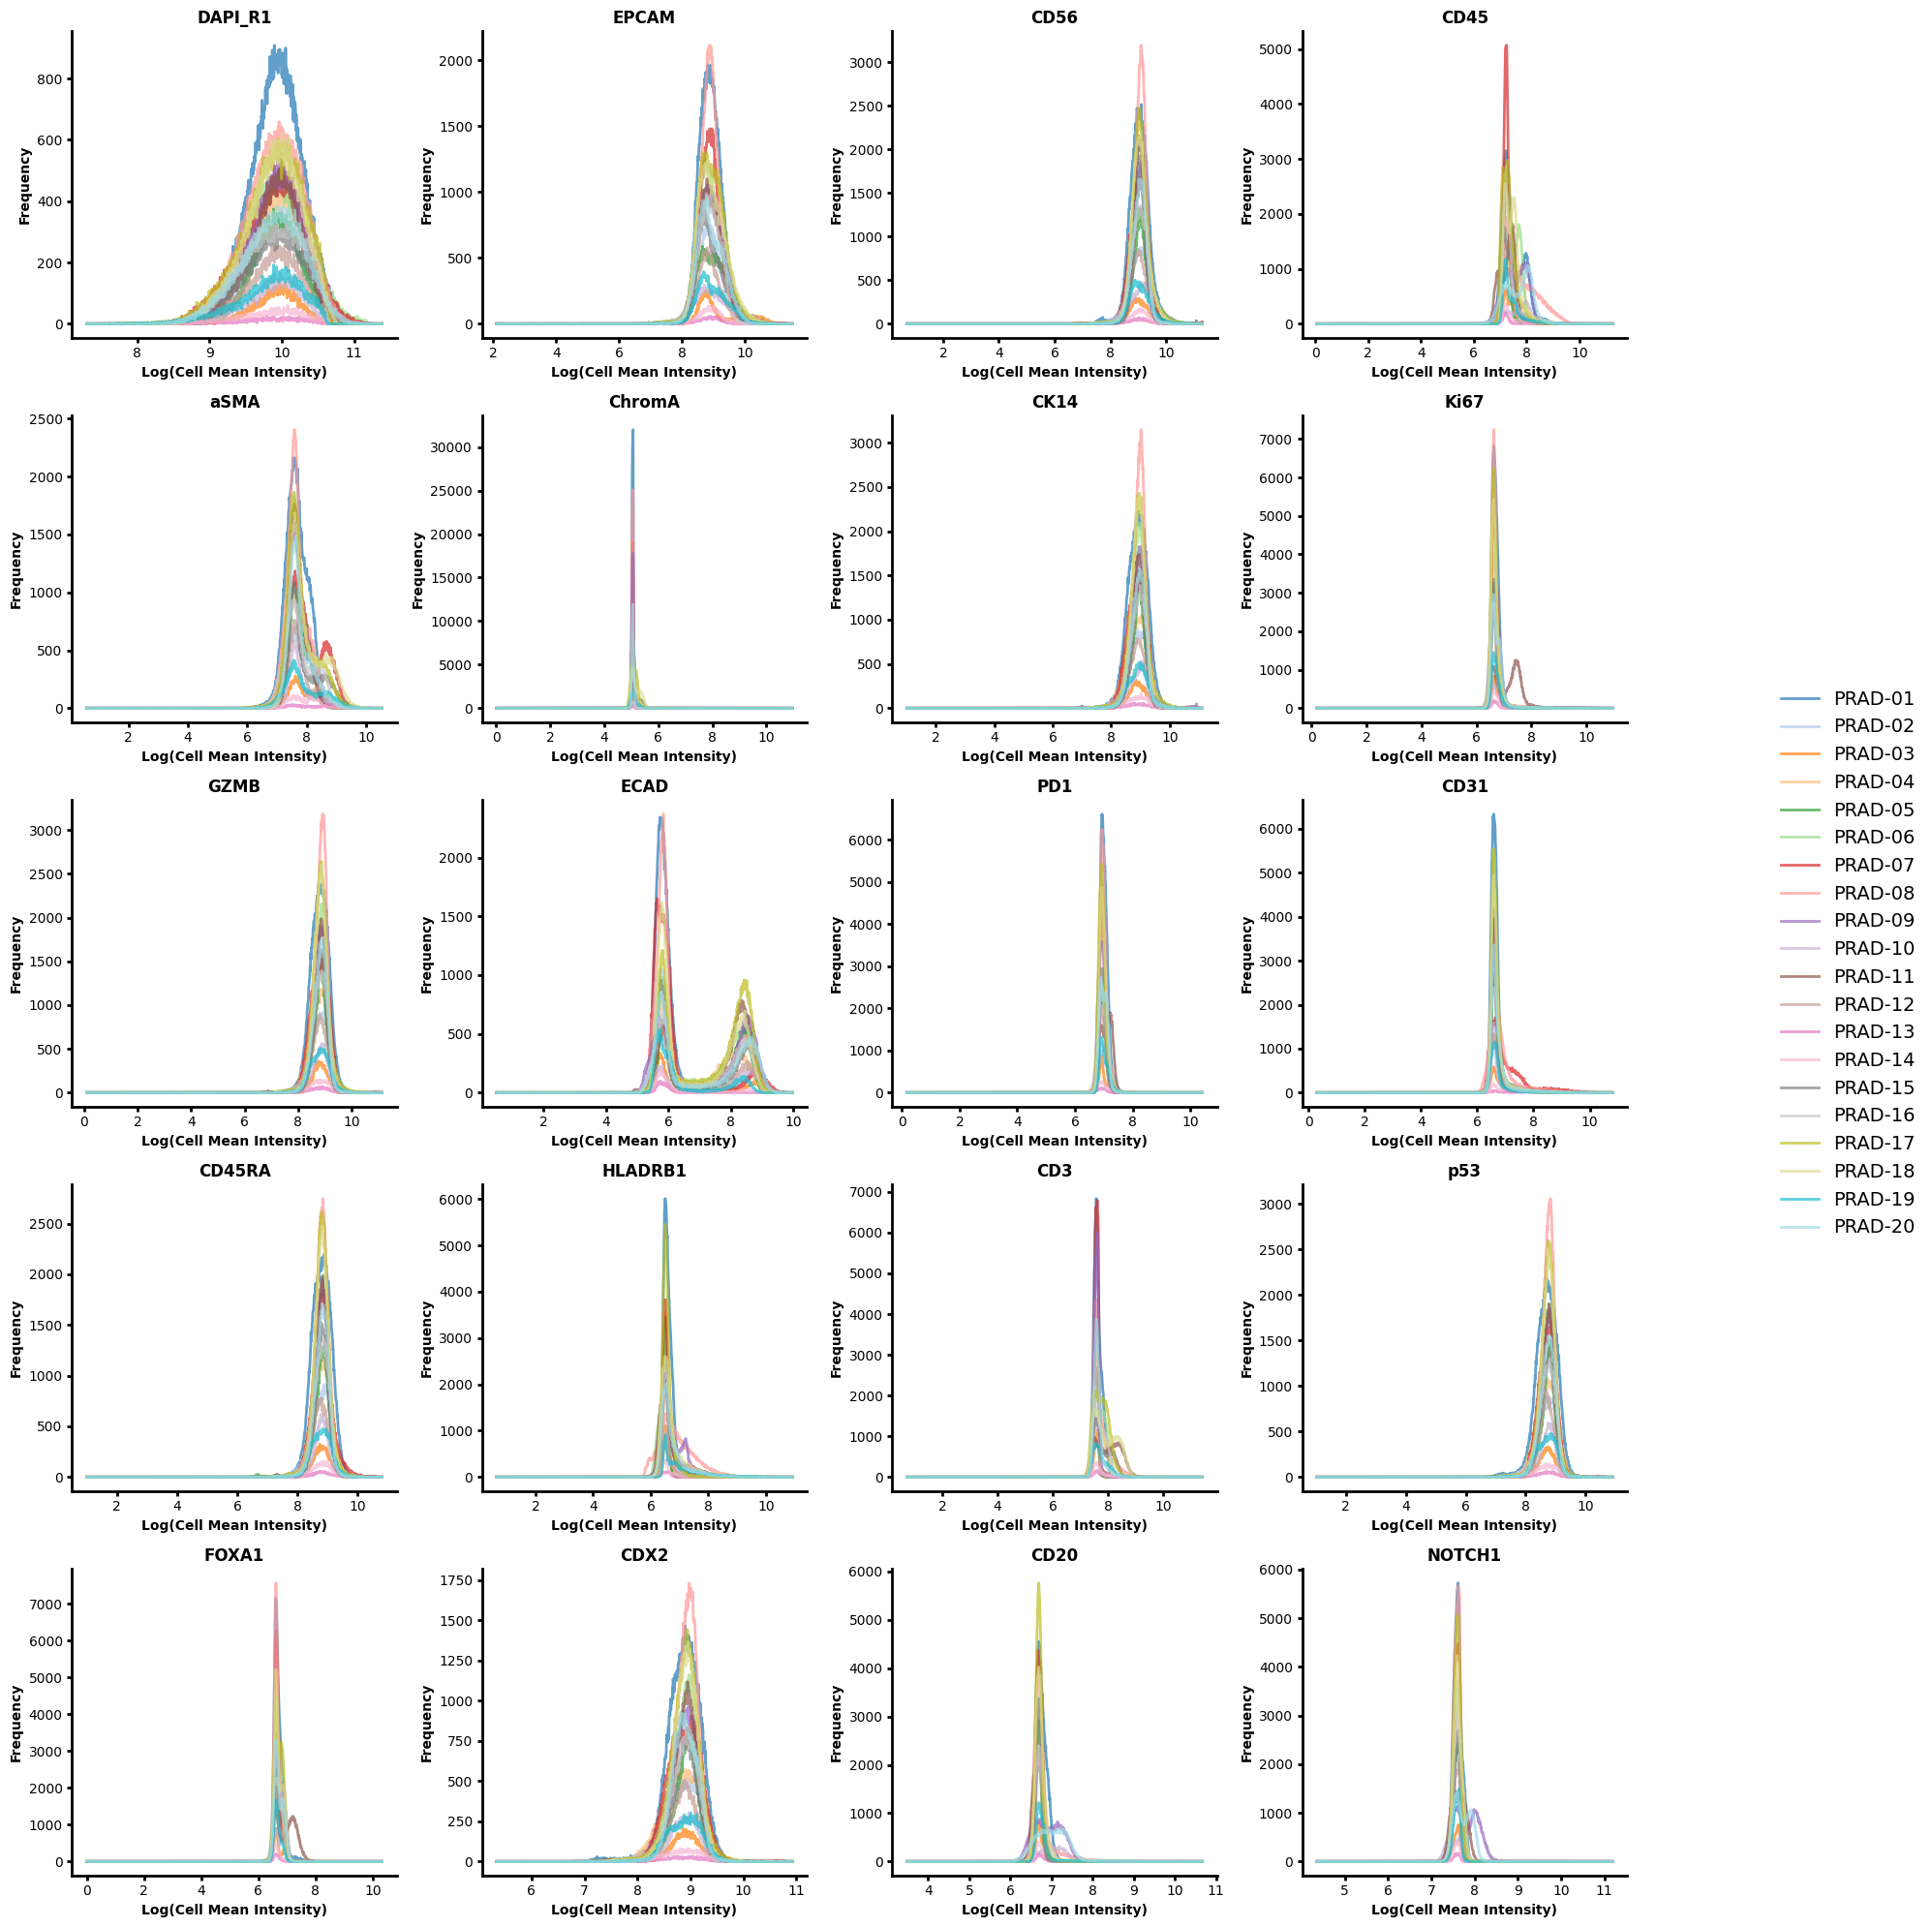

In [12]:
intensity_ranges, histograms, gmm_models = process_sample_distributions(
    feature_input       = feature_data,
    sample_ids          = PRAD_sample_names,
    all_markers         = PRAD_markers,
    markers_to_plot     = PRAD_markers,
    num_bins            = 1024,
    plots_per_row       = 4,
    dpi                 = 100,
    xlims               = None,
    ylims               = None,
    verbose=True
)